# 

# West Nile Virus Prevalence Prediction - Classification Modelling 

## Table of Contents

#### [Introduction](#Introduction)  
#### [Library and Data Imports](#Imports)
#### [Data Introduction](#Data-+-Description) 
#### [Data Cleaning](#Data-+-Cleaning) 
- [Data Shape](#Data-+-Shape) 
- [Data Types](#Data-+-Types) 
- [Duplicates](#Duplicates) 
- [Missing Values](#Missing-+-Values) 
- [Aggregation](#Aggregation) 

#### [Predicting Mosquito Number](#Predicting-+-Mosquito-+-Number) 
- [Preprocessing for Mosquito Number](#Preprocessing-+-for-+-Mosquito-+-Number) 
- [Statistical Analysis](#Statistical-+-Analysis)
- [Linear Regression](#Linear-+-Regression)
    
#### [Predicting WNV Presence](#Predicting-+-WNV-+-Presence) 
- [Analysis of Relationships](#Analysis-+-of-+-Relationships) 
- [Logistic Regression](#Logistic-+-Regression)
    

#### [Conclusion](#Conclu)

## Introduction <a id=Introduction a>

We are now going to continue our exploration of the West Nile Virus (WNV) found in Chicago's mosquito population. After performing our Exploratory Data Analysis we have a greater understanding of where we see the virus most. We know that the most common species is Culex Restuans but the virus is most commonly found in Culex Pipiens. Though Gravid are the most common traps, and catch the most mosquitos, Sentinel traps are most successful at catching WNV positive mosquitos, proportionally. 

Date and time of the year clearly have an impact on mosquitos, and thereby the presence of WNV. In the summer, when the temperature is high enough mosquitos become far more active and this higher activity could also lead to more spread. 

Overall, we have a clear view of how the West Nile Virus is found in Chicago, and are now ready to begin predicting presence based on these factors. 

## Library Imports and Formatting <a id=Imports a> 

In order to perform analysis of the data, we need to have tools that allow us the best functionality when working with a `.csv` file. Below we import some standard libraries that allow us to work more easily with the format of the data and perform statistical analysis.

We also import a `ds_utils.py` file with functions that are used throughout this analysis. Their uses are explained here but there is more detailed documentation in the file, located in the current directory.

In [114]:
# pandas and numpy are used for data format, for easier manipulation.
import pandas as pd
import numpy as np

In [115]:
# seaborn and variables matplotlib packages are used for visualiations.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [116]:
# Scipy's Stats gives us access to basic statistical analysis packages
from scipy import stats

In [117]:
# The Stats model api gives us access to regression analysis packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# Here I am importing my personal library of data science tools and functions
import ds_utils 

In [119]:
! pwd

/Users/pippidebree/Documents/DataScience/WestNileVirsusPrevalencePrediction


We will now set the figure size for all plots in the library allows for easier interpretation of visualisations. 

In [120]:
# Setting plot figure size (uses these settings every time you run the plot code).
plt.rcParams['figure.figsize'] = (8.0, 8.0)

# setting our style for seaborn visualisations
sns.set_style("whitegrid")
sns.color_palette("cubehelix")

[(0.10231025194333628, 0.13952898866828906, 0.2560120319409181),
 (0.10594361078604106, 0.3809739011595331, 0.27015111282899046),
 (0.4106130272672762, 0.48044780541672255, 0.1891154277778484),
 (0.7829183382530567, 0.48158303462490826, 0.48672451968362596),
 (0.8046168329276406, 0.6365733569301846, 0.8796578402926125),
 (0.7775608374378459, 0.8840392521212448, 0.9452007992345052)]

Now we are going to read in our data, from as csv_file, using a `ds_utils function` (this allows for easier data read ins and makes it easier to save and access different forms of our data).

---

## Data Introduction <a id=Data-+-Description a>

As a reminder, the specific Data Attributes are listed below, along with a description provided with the dataset.

Location and Temporal Data:

- **Date** Date and time that the WNV test is performed string Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.
- **Year** Year that the WNV test is performed
- **Week** Week that the WNV test is performed
- **Month** Month that the WNV test is performed 


Trap Data:
- **Trap** Id of the trap (Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.
- **Trap_type** Type of trap
- **Address_Block** Address of the location of trap
- **Lat** Latitude of trap
- **Lon** Longitude of trap

Mosquito Data:

- **Mosquito_number** number Number of mosquitoes caught in this trap (These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50).
- **WNV_Present** Whether West Nile Virus was present in these mosquitos
- **Species** Mosquito species

---

## Data Cleaning <a id=Data-+-Cleaning a>

Though the data is said to be clean, it is important to check this before going on with any analysis. We also need to ensure that the data is in the correct format (datatypes, no duplicates and no missing values) before we can perform any statistical analysis. To start we will read it in using the `read_csv_pd` function from the `ds_utils`. This function returns information on the number of duplicated rows and missing values in the pandas dataframe.

In [121]:
# read_csv_pd takes in a filepath and returns it as a pandas dataframe.
mosquito_clean = ds_utils.read_csv_pd("data/mosquito_clean.csv")

The DataFrame contains 17388 rows and 12 columns.
There are 0 missing values and 0 duplicated rows.


From this we can see that our import has gone as expected, and there are no duplicated rows and no missing values. We dealt with these issues in our Exploratory Data Analysis.

### Data Shape <a id=Data-+-Shape a>
Firstly, we will look at the shape of the data to ensure that we have the correct number of columns and a number of rows that makes sense.

In [122]:
# .shape returns the number of rows and columns in the dataframe
mosquito_clean.shape

(17388, 12)

From this we can infer that there are 12 columns in the dataset and 17388 individual rows. In order to have a greater understandning of the form of this data we will use `.info` to find the column names, datatypes and number of nulls.

In [123]:
# .info returns column feature
mosquito_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17388 entries, 0 to 17387
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             17388 non-null  object 
 1   Year             17388 non-null  int64  
 2   Week             17388 non-null  int64  
 3   Address_Block    17388 non-null  object 
 4   Trap             17388 non-null  object 
 5   Trap_type        17388 non-null  object 
 6   Month            17388 non-null  int64  
 7   WNV_Present      17388 non-null  bool   
 8   Species          17388 non-null  object 
 9   Lat              17388 non-null  float64
 10  Lon              17388 non-null  float64
 11  Mosquito_number  17388 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 1.5+ MB


From this output we can infer that some changes need to be made in order to have columns in a more usable format. 

Data Form Observations
- `Date` is not in a date format - instead it is recorded as an object.
- There is a combination of numeric and non-numeric columns (there are a few object types that refer to string, and most likely are categorical data). 
- The datasource shared that data was only collected when mosquitos were found, meaning there will be no data for 0 mosquitos found. 
- The datasource also shared that there was a limitation to number of mosquitos caught for each data point. There is a limit of 50, meaning that if more than this were caught another row in the dataset would have the 'spill over' 
- There is one True/False attribute - `WNV Present` - it may make sense to change this to a binary type for ease of data manipulation in modelling.
- Given that we will be performing regressions, we will need to think about turning our categorical variables into dummy variables.
- All numeric values are int64 datatypes, except `Lat` and `Lon` which makes sense given that latitude and longitude coordinates usually have many decimal places. 
- There is a lot of data and location data (mainly the `Date`, `Year` and `Week` columns) - It is intersting to think about why the data may be grouped into weeks. 

### Data Types <a id=Data-+-Types a>
Our above data form observartions show that there are some changes to be made in the data types.
Firstly, we can see that the Date variable is not a datetime format. We will make this change so that we can use the functionality built into the datetime data type. This will allow us to look at years, months, days and specific times. 

In [124]:
# Using the to_datetime() method alters the datatype to a datetime[ns] type.
mosquito_clean["Date"] = pd.to_datetime(mosquito_clean["Date"])

It is also clear that changing `WNV_Present` to a binary variable would allow for greater functionality, particularly when we begin to think about modelling. We will make this change in our modelling preprocessing. 

Now, we have our data clean. We will export this cleaned data so that we have a benchmark of our progress, this will also make it easier when performing preprocessing as we have a dataset that is prepared for this stage, and can reaccess it if reconsidering.

In [125]:
# Pandas .to_csv method allows us to save the dataframe as csv file in the chosen filepath
mosquito_clean.to_csv("data/mosquito_cleanmod.csv", index=False, encoding='utf-8')

We now will consider two regressions, a linear regression to predict the number of mosquitos at a trap at a certain time and a logistic regression to predict the presence of West Nile Virus. In order to successfully consider both regressions we must go through preprocessing twice, once for each independent variable. We will start with the Linear Regression.

---

## Predicting Mosquito Number <a id=Predicting-+-Mosquito-+-Number a>

### Preprocessing for Mosquito Number <a id=Preprocessing-+-for-+-Mosquito-+-Number a>

In order to perfrom effective preprocessing, we are going to create two sub-dataframes - one for categorical variables and one for numeric variables. This will allow us to look at the distributions in a form that is appropriate for the datatype. 

In [126]:
mosquito_clean.columns

Index(['Date', 'Year', 'Week', 'Address_Block', 'Trap', 'Trap_type', 'Month',
       'WNV_Present', 'Species', 'Lat', 'Lon', 'Mosquito_number'],
      dtype='object')

Knowing our datatypes we are going to use the `ds_utils.num_cat_cols()` function in order to create two lists of columns. One for numeric columns and one for categorical columns. It also includes the functionality of being able to decide whether datetime is numeric or not (this is ambiguous in some cases). In our case, we will define our one datetime column, `Date` as numeric - this allows us to consider how it functions numerically. If we were to consider it a category we would have far too many categories to reasonably consider. 

In [127]:
# ds_utils.num_cat_cols() returns two lists, one with the numeric columns and one with the categorical columns
mos_num_col, mos_cat_col = ds_utils.num_cat_columns(mosquito_clean, datetime_is_numeric=True)

The Numeric columns: 
	Date,
	Year,
	Week,
	Month,
	Lat,
	Lon,
	Mosquito_number

The Categorical columns: 
	Trap,
	WNV_Present,
	Trap_type,
	Species,
	Address_Block


In some ways our date variables could be considered categorical but leaving them as numeric allows for built in nomial variable encoding (each `Week` is one week apart from the next, same with `Year` and `Month`). Treating these as categorical would be overcomplicating them.

Now that we have our lists of categorical and numeric columns we can create two corresponding dataframes for preprocessing.

In [128]:
# Here we are creating a dataframe with only the numeric columns
mos_clean_num = mosquito_clean[mos_num_col].copy()

In [129]:
# Here we are creating a dataframe with only the categorical columns
mos_clean_cat = mosquito_clean[mos_cat_col].copy()

### Categorical Variables  

We will begin with looking at our categorical variables. Our intial data observations showed that it would be a good idea to change `WNV_Present` to a binary variable and that we should consider dummy variables generally. Looking at the number of unique values for each variable will give us a clearer view of how we should handle them.   
    
Our categorical variables to consider are:
- `WNV_Present`
- `Trap type`
- `Species`
- `Address_Block`
- `Trap`

In [130]:
mos_clean_cat.nunique().sort_values()

WNV_Present        2
Trap_type          3
Species            4
Address_Block    154
Trap             189
dtype: int64

We see that there are two categorical variables with very high number of categories. `Address_Block` has unique values for every testing location. Keeping this data is not necessary because the number of categories is so high it would be difficult to group them and similar data is represented by `Lat` and `Lon`.

`Trap` corresponds to the name of a specific trap, in a specific location. Though this may give us information about the type of trap, we already have the `Trap_type` variable and so do not need this information. It would be very difficult to create sub-groupings of these traps because they are unique values, and again the `Lat` and `Lon` variables could be helpful replacements.

As we are creating preprocessed dataframes for both categorical and numeric, we will remove `Address_Block` and `Trap` from our `mos_clean_cat` dataframe. This will allow us to have a collection of variables that are ready to be used in a predictive regression. 

In [131]:
# Here we are dropping the `Address_Block` and `Trap` variables from our categorical variables dataframe. 
mos_clean_cat = mos_clean_cat.drop(columns=["Address_Block","Trap"])

We will now consider the best transformations of `Trap_type` and `Species`. In order to get these in a form that will be usable in a regression model we will need to make some changes. 

#### Preprocessing `WNV Present`  - Binary Variable

From our exploration we know that it may be helpful to look into changing `WNV_Present` into a binary variable. Before we do so, it is helpful to look at the distribution of this variable.

We will use the `ds_utils.prepro_plot` function to create an appropriate description of the distribution of `WNV_Present` and a visualisation for its relationship with `Mosquito_number`. This function takes in two variables, the latter considered the dependent variable, and returns information about the distribution between the two based on their datatypes (numeric or categorical) More explaination is in the ds_utils.py file. In this case we will get a value counts output and a boxplot because we are using a categorical variable to predict a numeric one. 

Description of WNV_Present
count     17388
unique        2
top       False
freq      14105
Name: WNV_Present, dtype: object


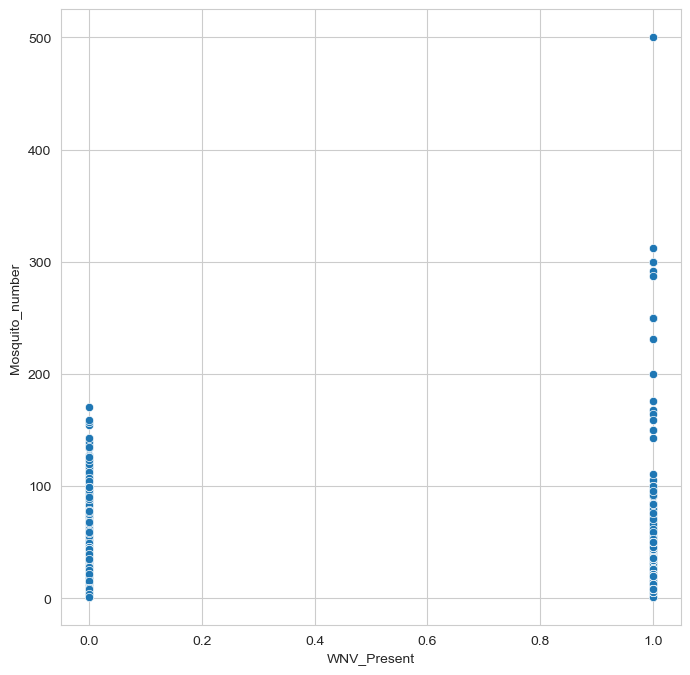

In [132]:
ds_utils.prepro_plot(mosquito_clean, "WNV_Present", "Mosquito_number", norm=True)

From the above output we can see that there is are clearly far fewer rows with positive `WNV_Present` designations (18.9%). This makes sense as it shows us that there is a large sample being collected, for the tracking of the disease. There are Mosquitos present, in general, in tests that have a positive `WNV_Present`. This may be because mosquitos who are together more (this could be dependent on species) will spread a disease within themselves faster.

Though we have considered the relationship above, it is clear that there may be an issue in using `WNV_Present` to predict `Mosquito_number`. Inherently, the presence of WNV is dependent on mosquitos being present and therefore also the number of mosquitos being present. We will not use `WNV_Present` to predict `Mosquito_number`. 

However, it is helpful to turn the `WNV_Present` into a binary column for more functionality. The column only has two values "positive", for when WNV is detected, and "negative", for when it is not. This means that it can be altered to only contain '0's and '1's. In this case we will assign '1' where it had been positive and '0' where it had been negative. 

As a note, the designations for the rows will be changed and, given that there may be multiple mosquitos for each row, this will affect all the mosquitos stored per row (the discussion in our EDA led us to believe that we should consider all mosquitos in a row with a specific designation as having that designation - i.e. 26 mosquitos in a `WNV_Present` 'positive' row all carry the virus. 

We will make the change in the datatype by mapping False values to 0 and True values to 1. This will create a dummy variable for the presence of WNV. 

In [133]:
mos_clean_cat['WNV_Hold'] =  mos_clean_cat["WNV_Present"]
mos_clean_cat['WNV_Present'] = mos_clean_cat["WNV_Present"].map({False:0, True:1})

We will now check that the value counts are the same using our `ds_utils.equal_transform()` function. 

In [134]:
# Checking the value counts in our new series matches the old series.
ds_utils.equal_transform(mos_clean_cat["WNV_Hold"], mos_clean_cat["WNV_Present"])

Series are equal.


As the series are equal, we know that we have successfully transformed `WNV_Present` into a binary column. We can now drop the `WNV_Present_hold` column.

In [135]:
# Dropping our hold column
mos_clean_cat = mos_clean_cat.drop(columns="WNV_Hold")

#### Preprocessing `Trap_type` - Dummy Variables

Before we consider creating dummy variables for `Trap_type`, it is important to look into the distribution and relationship with `Mosquito_number`. 

Again, we will use the `ds_utils.prepro_plot` function. In this case, a categorical variable is being considered to predict a numerical so a boxplot is appropriate.

Value Counts For Trap_type
GRAVID      16717
CDC           474
SENTINEL      197
Name: Trap_type, dtype: int64


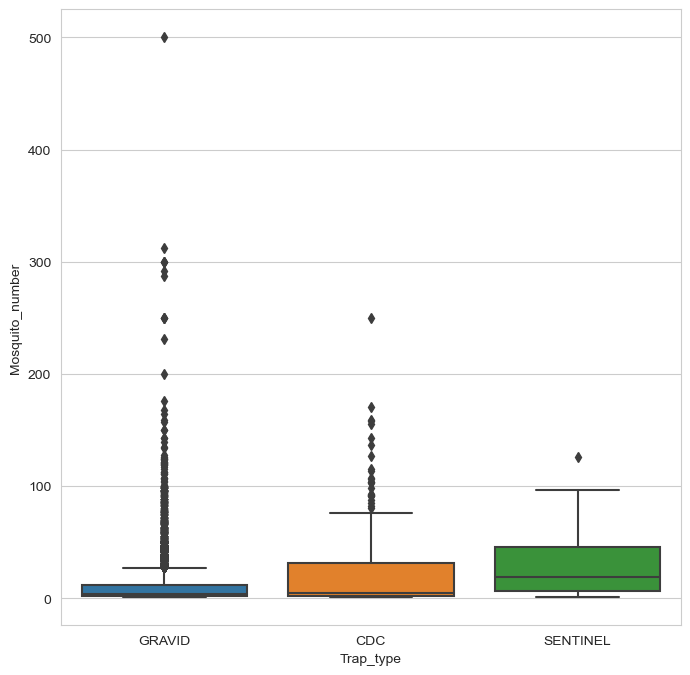

In [136]:
# Here we create a boxplot and get value counts for the Trap_Type variable and it's relationship with Mosquito_number
ds_utils.prepro_plot(mosquito_clean, "Trap_type", "Mosquito_number")

From the above output we can see that upwards of 96% of mosquitos are caught in GRAVID traps. However, those that are caught in CDC and SENTINEL traps are far more likely to be caught in a higher volume (as their distributions spread further).

Next we will create variables for each `Trap_type`. These will store whether or not a row is associated with the given `Trap_type in a binary form`. In order to see how many columns we will create we can look at the counts for each trap (this will also serve to aid a sanity check).

Before we make the dummy variables, it is helpful to make a copy of the `Trap_type` column, as this will allow for a sanity check.

In [137]:
# We are creating a hold variables to allow for a sanity check
mos_clean_cat["Trap_type_hold"] = mos_clean_cat["Trap_type"]

Now that we have only three Trap_types we can make our dummy variables. To do this we will use pandas .get_dummies() method on the column "Trap_type". This will remove this column and replace it with three binary columns - one for the presences of each trap in data rows. 

In [138]:
mos_clean_cat = pd.get_dummies(mos_clean_cat, columns=["Trap_type"])

As our sanity check we will sum the columns to find the number of rows associated with each trap. Once we have this we can reference our original value counts and check that our transformation has been doing correctly.

In [139]:
# Creating an output of the number of traps in each dummy variable.
trap_dummies = ['Trap_type_GRAVID','Trap_type_CDC', 'Trap_type_SENTINEL']
for i in trap_dummies:
    print("The number of mosquitos caught in", i.split("_")[1], "traps is", mos_clean_cat[i].sum())

The number of mosquitos caught in type traps is 16717
The number of mosquitos caught in type traps is 474
The number of mosquitos caught in type traps is 197


These numbers match the value counts from the `prepro_plot` output, so we can be sure that we have correctly performed the transformation.

We can now drop our `Trap_type_hold` variable, as it will not be helpful for statistical analysis.

In [140]:
# Dropping the hold variable for trap type
mos_clean_cat = mos_clean_cat.drop(columns="Trap_type_hold")

#### Preprocessing `Species` - Dummy Variables
Again, we will use the `ds_utils.prepro_plot` function to get an appropriate data description and plot. `Species` is a categorical variable and we are still considering `Mosquito_number`, so we will again get value counts and a boxplot. 

Value Counts For Species
CULEX RESTUANS      11061
CULEX PIPIENS        5191
CULEX TERRITANS       914
CULEX SALINARIUS      222
Name: Species, dtype: int64


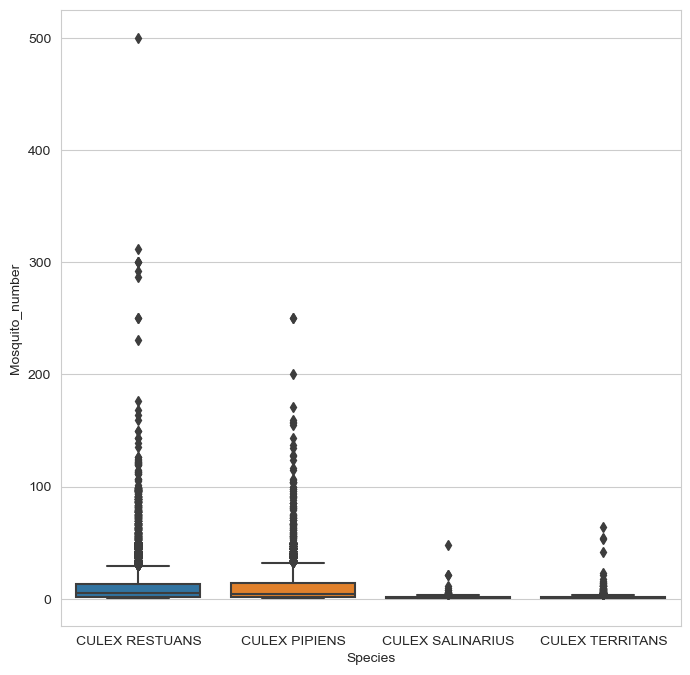

In [141]:
# We use this function to get a distribution and visualisation of Species
ds_utils.prepro_plot(mosquito_clean, "Species", "Mosquito_number")

From tihs output it is clear that an overwhelming majority of mosquitos caught are Culex Restuans, followed by half the number of Culex Pipiens. The other two species appear far less in the data. We do see that the spread of mosquitos found in a trap is larger for our dominating species, this may be because the smaller species do not have the same quantities. 

We will now go to create our dummy variables for the `Species` column. It is helpful to make a copy of the column, as this will allow for a sanity check.

In [142]:
# We are creating a hold variables to allow for a sanity check
mos_clean_cat["Species_hold"] = mos_clean_cat["Species"]

In [143]:
# Checking the value types before we make the transformation will allow us to ensure that we have correctly created 
# dummy variables with the right number of each species.
mos_clean_cat["Species"].value_counts()

CULEX RESTUANS      11061
CULEX PIPIENS        5191
CULEX TERRITANS       914
CULEX SALINARIUS      222
Name: Species, dtype: int64

In [144]:
mos_clean_cat = pd.get_dummies(mos_clean_cat, columns=["Species"])

In [145]:
spec_dummies = ['Species_CULEX RESTUANS','Species_CULEX PIPIENS','Species_CULEX TERRITANS',
       'Species_CULEX SALINARIUS']

for i in spec_dummies:
    print("The number of", i.split("_")[1], "mosquitos is", mos_clean_cat[i].sum())

The number of CULEX RESTUANS mosquitos is 11061
The number of CULEX PIPIENS mosquitos is 5191
The number of CULEX TERRITANS mosquitos is 914
The number of CULEX SALINARIUS mosquitos is 222


This matches with our earlier calculations of the number of mosquitos from each Species. We can now remove our `Species_hold` variable, as we will not need it for modelling.

In [146]:
mos_clean_cat = mos_clean_cat.drop(columns="Species_hold")

Given that our original `Species` values have a space in them (e.g. `CULEX PIPIENS`, we are going to replace the spaces in these names with '_' characters (like before). 

In [147]:
# Changing our column names to have only "_" values, and no empty spaces
mos_clean_cat.columns = mos_clean_cat.columns.str.replace(" ", "_", regex=False)

We now have a matrix of categorical variables that is ready for modelling.

In [148]:
mos_clean_cat.head()

,WNV_Present,Trap_type_CDC,Trap_type_GRAVID,Trap_type_SENTINEL,Species_CULEX_PIPIENS,Species_CULEX_RESTUANS,Species_CULEX_SALINARIUS,Species_CULEX_TERRITANS
0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0
4,0,0,1,0,0,1,0,0


As a note, we will not use `WNV_Present` to predict `Mosquito_number` but chose to keep it in our preprocessed categorical variable dataframe because it will allow for more functionality when considering the Logsitic Regression. 

### Numeric Variables 
    
Now we will focus on numeric variables, this is slightly easier as most of the variables do not need to change shape.
    
Our numeric variables to consider are:
- `Year`
- `Week`
- `Date`
- `Lat`
- `Lon`
- `Month`
- `Mosquito_number`

First, we will look at the distribution of `Mosquito_number`. We will not remove this variable from our numerical dataframe even though it is not a predictor, as we will need it to fit our model. 

Using the `.describe()` function will show us the numbers behind the distribution.

In [149]:
mos_clean_num["Mosquito_number"].describe()

count    17388.000000
mean        10.947378
std         17.781919
min          1.000000
25%          2.000000
50%          4.000000
75%         13.000000
max        500.000000
Name: Mosquito_number, dtype: float64

From this we can see that there should be a right skew - as the median (reported as 50%) is 4.00 and the mean is larger at 10.95. The larger mean implies that there are very large values that are driving the average number up.

We will now create a histogram to see the true distrbution of "Mosquito number" and show the mean and median of the distribution as red and blue lines, respectively.

The mean "Mosquito_number" is: 10.947377501725327
The median "Mosquito_number" is: 4.0


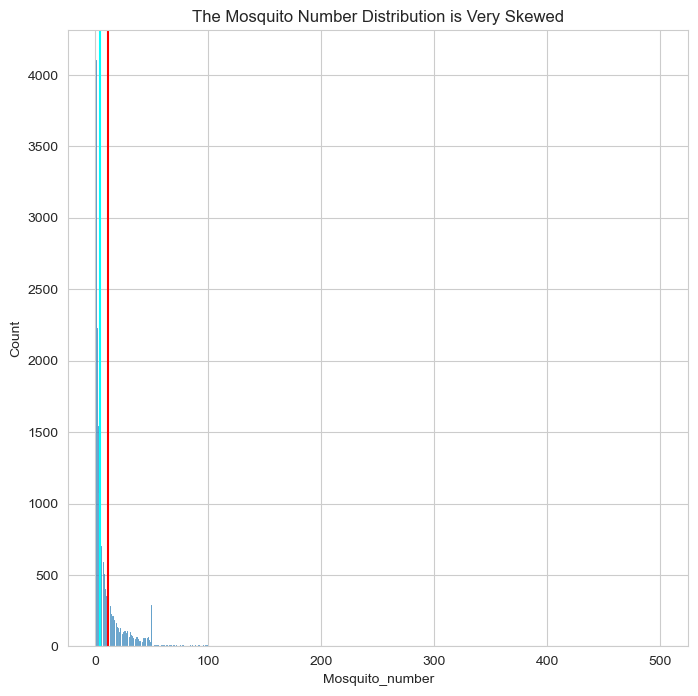

In [150]:
# Creating a histogram of Mosquito_number
sns.histplot(mos_clean_num["Mosquito_number"]) # plots histogram
plt.axvline(mos_clean_num["Mosquito_number"].mean(), color='red') # Plots mean line on histogram
plt.axvline(np.median(mos_clean_num["Mosquito_number"]), color='cyan') # Plots median line on histogram
plt.title("The Mosquito Number Distribution is Very Skewed")

print("The mean \"Mosquito_number\" is:",mos_clean_num["Mosquito_number"].mean())
print("The median \"Mosquito_number\" is:",np.median(mos_clean_num["Mosquito_number"]))

This non-normality will be an issue when trying to use a linear regression to predict `Mosquito_number`. We will consider transformations as a potential solution to this issue.

#### Considering Date Variables

In our intial data observations we saw that there are a few different formats for the date of the test done. There are `Year`, `Week`, `Date` and, newly, `Month`. We need to consider which of these variables to consider when doing our statistical analysis. In our previous EDA we saw that the `Year` variable was very randomly distributed, probably a result of annual weather impacting on mosquito population. We also saw that the `Week` variable did not appear uniformly through the dataset. Instead, summer weeks were far more common that weeks at the bookends of the season. Looking into `Date` showed us that this variable is too information dense to draw any conclusion from, and the same can be said for `Day`. For this reason, we are not going to use the `Date` variable in our statistical analysis. 

Below is the code to drop `Date` from our numerical variables dataframe.    

In [151]:
mos_clean_num = mos_clean_num.drop(columns=["Date"])

Now we will look more closely at the `Month` variable, considering we have not done any exploratory data analysis.

#### Looking at Month

We will start by considering how the number of mosquitos change by month. In particular, we want to see, for the whole dataset, if there are months with higher average `Mosquito_number` totals. 
 
In order to do this we will create a pivot table that has `Month` on one axis and `Year` on the other, then we will aggregate the `Mosquito_number` for each distinct combination. 

In [152]:
mosquito_month = pd.pivot_table(data=mosquito_clean, values="Mosquito_number", index="Year", columns="Month", aggfunc=sum)
mosquito_month

Month,5,6,7,8,9,10
Year,,,,,,
2007,30.0,306.0,1376.0,18604.0,3315.0,924.0
2008,NaN,461.0,1426.0,1412.0,583.0,NaN
2009,86.0,1992.0,2245.0,619.0,440.0,80.0
2010,NaN,1583.0,3634.0,1507.0,807.0,32.0
2011,NaN,2132.0,3104.0,937.0,1083.0,NaN
2012,NaN,1075.0,5818.0,3033.0,777.0,NaN
2013,NaN,2372.0,7312.0,7598.0,5623.0,NaN
2014,NaN,4028.0,8280.0,13170.0,4115.0,174.0
2015,NaN,2015.0,4958.0,3279.0,530.0,NaN


As we can see, there are months in the dataset that do not have any `Mosquito_number` entries. When calculating the averages we need to consider the number of months that appear in each year. So, to find the average for each month we will sum the month columns and divide by the number of values in that column. 

In [153]:
# We manually calculate the means for each year by looping over the month in range 5 to 10 (May to October)
for i in range(5, 11):
    print(f'The average number of mosquitos caught in month {i} is {round(mosquito_month[i].sum()/ mosquito_month[i].count(), 2)}')

The average number of mosquitos caught in month 5 is 58.0
The average number of mosquitos caught in month 6 is 2189.15
The average number of mosquitos caught in month 7 is 4299.08
The average number of mosquitos caught in month 8 is 5934.69
The average number of mosquitos caught in month 9 is 2117.62
The average number of mosquitos caught in month 10 is 302.5


There is clearly a peak in June and July (the 7th and 8th months). In our intial data exploration, we considered that this may be the result of average temperatures reaching the activation temperature for different species (in particular Culex Pipiens). Regardless, if this is statisitcally significant it would be very useful in predicting `Mosquito_number`.

Below we plot the sum of `Mosquito_number` by month, for every year. This will show us the general pattern of across the months of the season.

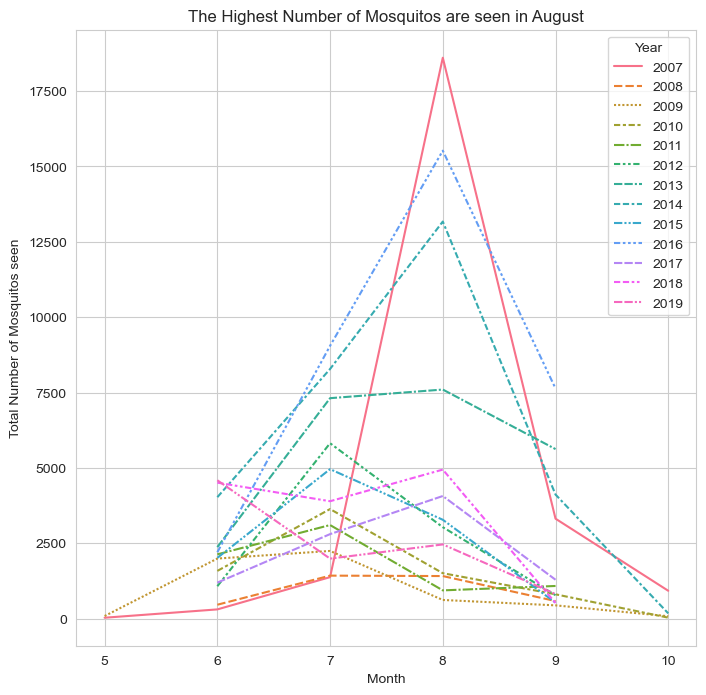

In [154]:
# This is not averaged (as we have the totals for each month), but instead shows the totals for each month
sns.lineplot(data=mosquito_month.transpose())
plt.title("The Highest Number of Mosquitos are seen in August")
plt.ylabel("Total Number of Mosquitos seen")
plt.show()

There is clearly some missing data here, from the lack of mosquitos at the beginning and ends of the season, but the plot still highlights a clear relationship between `Month` and `Mosquito_number`. The peak is clearly in the summer for most of the years - this makes sense given, as discussed in our EDA, mosquito temperature sensitivity. 

#### Location and Mosquito Number

Apart from the Date variables, the only truely numeric variables are the coordinate variables `Lat` and `Lon`. This in itself is an issue for a linear regression. Regardless, we will continue our exploration of these variables and their relationship with `Mosquito_number`.

We will use the `ds_utils.prepro_plot()` function again, this time it will consider that we are using numeric values to predict a numeric value and show us a scatterplot along with the data description.

Description of Lat
count    17388.000000
mean        41.848822
std          0.114628
min         41.644720
25%         41.745389
50%         41.867599
75%         41.962015
max         42.017801
Name: Lat, dtype: float64


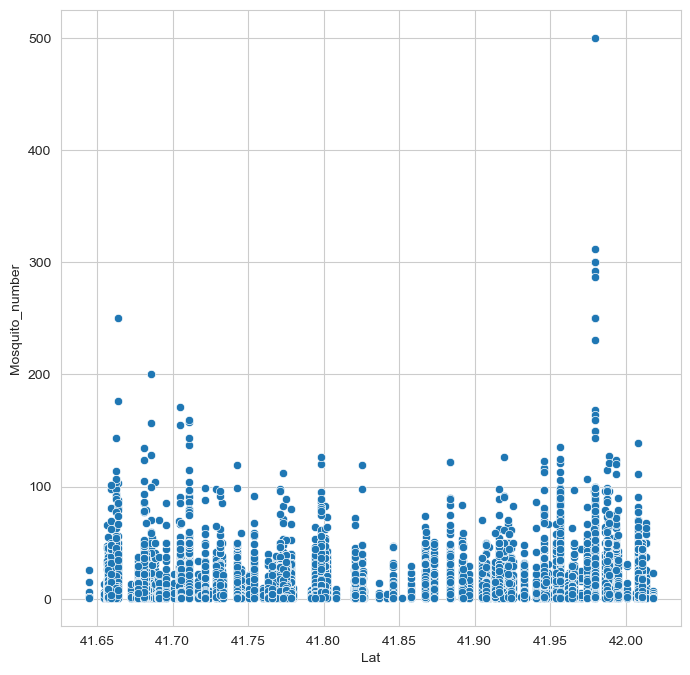

Description of Lon
count    17388.000000
mean       -87.709218
std          0.095907
min        -87.906036
25%        -87.764737
50%        -87.700238
75%        -87.643076
max        -87.531051
Name: Lon, dtype: float64


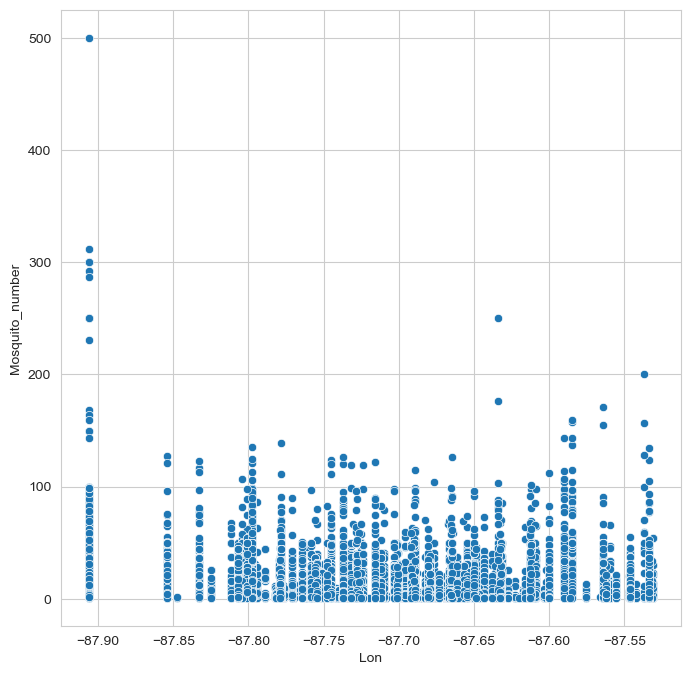

In [155]:
ds_utils.prepro_plot(mos_clean_num, "Lat", "Mosquito_number")
ds_utils.prepro_plot(mos_clean_num, "Lon", "Mosquito_number")

It is not easy to interpret these coordinate values, but it does seem that there are fairly well dispersed values for both `Lat` and `Lon`.

Overall, we will continue with all of our numeric variables, except for `Date`. There may be an issue of multicollinarity between the three date variables (`Year`, `Month` and `Week`) but we will consider this when preparing for our model.

#### Combining Categorical and Numeric
We will now combine the `mos_clean_cat` and `mos_clean_num` dataframes in order to get a dataframe with all the potential independent variables and our dependent variable `Mosquito_number`.

In [156]:
# Renaming the dataframe allows us to create data form benchmarks.
mosquito_prepro = pd.concat([mos_clean_cat, mos_clean_num], axis=1)

# call this to make sure we have correctlty added the dfs together
mosquito_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17388 entries, 0 to 17387
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WNV_Present               17388 non-null  int64  
 1   Trap_type_CDC             17388 non-null  uint8  
 2   Trap_type_GRAVID          17388 non-null  uint8  
 3   Trap_type_SENTINEL        17388 non-null  uint8  
 4   Species_CULEX_PIPIENS     17388 non-null  uint8  
 5   Species_CULEX_RESTUANS    17388 non-null  uint8  
 6   Species_CULEX_SALINARIUS  17388 non-null  uint8  
 7   Species_CULEX_TERRITANS   17388 non-null  uint8  
 8   Year                      17388 non-null  int64  
 9   Week                      17388 non-null  int64  
 10  Month                     17388 non-null  int64  
 11  Lat                       17388 non-null  float64
 12  Lon                       17388 non-null  float64
 13  Mosquito_number           17388 non-null  int64  
dtypes: flo

The `.info()` output shows us that we have all our variables ready. There are no null or missing values (all variables have 17390 rows) and all the variables are in numeric form. 

Now that we have our data preprocessed and ready for statistical analysis we will export this version as a marker for our data. It is also helpful to store data in this form for future analysis.

In [157]:
# Pandas .to_csv method allows us to save the dataframe as csv file in the chosen filepath
mosquito_prepro.to_csv("data/mosquito_preprocessed.csv", index=False, encoding='utf-8')

## Statistical Analysis <a id=Statistical-+-Analysis a>


We will now look to finding the statistical significance of the relationships between our potential independent variables and `Mosquito_number`. While doing this we will consider any potential issues for multicollinearity, caused by strong relationships between the independent variables.

### Correlation with Number of Mosquitos Caught

We will use a correlation matrix to look into how correlated all the variables are with each other.

In [158]:
# .corr() gives us the correlation matrix.
mosquito_prepro.corr()

,WNV_Present,Trap_type_CDC,Trap_type_GRAVID,Trap_type_SENTINEL,Species_CULEX_PIPIENS,Species_CULEX_RESTUANS,Species_CULEX_SALINARIUS,Species_CULEX_TERRITANS,Year,Week,Month,Lat,Lon,Mosquito_number
WNV_Present,1.000000,0.011285,-0.040672,0.056657,0.077037,-0.014175,-0.045702,-0.104419,0.136992,0.173795,0.161026,0.054742,-0.060209,0.318070
Trap_type_CDC,0.011285,1.000000,-0.835572,-0.017920,0.139298,-0.133253,0.043878,-0.020440,-0.247967,0.022670,0.062945,-0.042236,0.033191,0.089874
Trap_type_GRAVID,-0.040672,-0.835572,1.000000,-0.534319,-0.091136,0.081821,-0.033066,0.027122,0.138195,-0.041044,-0.071454,0.043092,-0.055353,-0.125976
Trap_type_SENTINEL,0.056657,-0.017920,-0.534319,1.000000,-0.048462,0.056115,-0.007334,-0.017910,0.130018,0.039819,0.033194,-0.013440,0.049671,0.090988
Species_CULEX_PIPIENS,0.077037,0.139298,-0.091136,-0.048462,1.000000,-0.862576,-0.074189,-0.153664,-0.338656,0.312600,0.326953,-0.039031,0.002658,0.010447
Species_CULEX_RESTUANS,-0.014175,-0.133253,0.081821,0.056115,-0.862576,1.000000,-0.150363,-0.311438,0.332971,-0.311135,-0.323467,0.061398,-0.031866,0.058501
Species_CULEX_SALINARIUS,-0.045702,0.043878,-0.033066,-0.007334,-0.074189,-0.150363,1.000000,-0.026786,-0.065891,-0.012329,-0.009813,-0.002827,-0.010495,-0.057166
Species_CULEX_TERRITANS,-0.104419,-0.020440,0.027122,-0.017910,-0.153664,-0.311438,-0.026786,1.000000,0.009752,0.035956,0.031842,-0.050907,0.068530,-0.118784
Year,0.136992,-0.247967,0.138195,0.130018,-0.338656,0.332971,-0.065891,0.009752,1.000000,-0.017186,-0.095690,0.069973,-0.060594,0.097122
Week,0.173795,0.022670,-0.041044,0.039819,0.312600,-0.311135,-0.012329,0.035956,-0.017186,1.000000,0.949938,-0.002168,0.004667,-0.036611


Using a heatmap with convergent colors allows us to visualise this more easily.

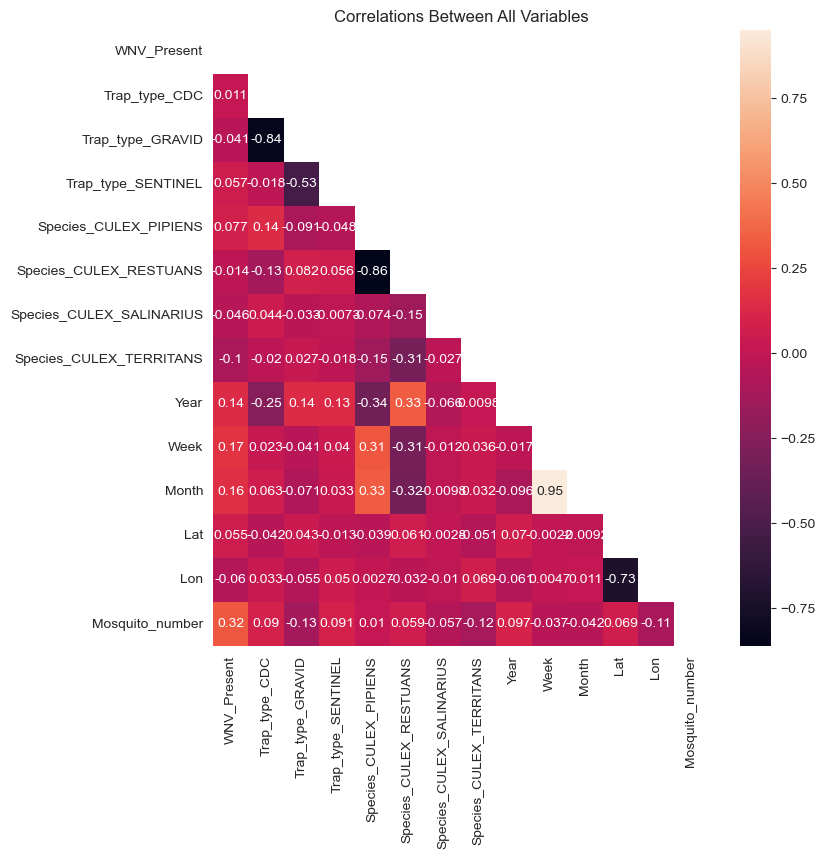

In [159]:
corr = mosquito_prepro.corr()
# Creates a matrix of the correlations.
matrix = np.triu(mosquito_prepro.corr())
# Applies the matrix to a heatmap 
sns.heatmap(corr, annot=True, mask=matrix)
plt.title("Correlations Between All Variables")
plt.show()

From these outputs we see that the columns that are positively correlated with "Mosquito_number" are: 
- `WNV Present` 
- `Trap_type_CDC`
- `Trap_type_SENTINEL`
- `Species_CULEX_PIPIENS`
- `Species_CULEX_RESTUANS`
- `Year` 
- `Lat` 


The columns that are negatively correlated with "Mosquito_number" are:
- `Trap_type_GRAVID`
- `Species_CULEX_SALINARIUS`
- `Week`
- `Lon` 
- `Month` 

Variables that have a correlation that may be too high are:
- `Trap_type_GRAVID` and `Trap_type_CDC` 
- `Species_CULEX_PIPIENS` `Species_CULEX_RESTUANS`
- `Week` and `Month` 
- `Lat` and `Lon`

We need to decide which of these pairs we want to remove from our potential variables. Doing so will reduce correlation between our independence variables and thereby multicollinearity. Multicollinearity is an issue because for a Linear Regression to be statistically sound, it's predictor variables need to be independent. Before we make these choices, we want to consider the statistical significance of each relationship with `Mosquito_number`. If one of the two variables has a correlation that is not statistically significant, it makes more sense to drop that one. 

We also need to ensure that the dummy variable categories both have a dummy variable dropped in order to reduce multicollinearity. If we do not do so we will have variables that are all intrisically linked.

#### Statistical Significance of Correlation

In order to look at the statistical significances of the correlations between `Mosquito_number` and the rest of the variables we will iterate over the variables.

For each combination of variables we will do the same hypothesis test. Namely, our null hypothesis will be that the selected variable and `Mosquito_number` have a correlation of 0 and our alternative hypothesis will be that the correlation will not be 0. 


$$H_0: \rho_{mosquito\ number,\ variable} = 0 $$ 
$$ H_1: \rho_{mosquito\ number,\ variable} \neq 0$$


In order to reject the null hypothesis we would need to find a p-value of less than 0.05, as this would suggest that the chance of having a correlation of 0 is too small with the data we have.

In [160]:
print("The correlation coefficient and p-value for the Mosquito_number and ")

for variable in mosquito_prepro.drop(columns='Mosquito_number').columns:
    print(variable, ": \n\t",
         stats.pearsonr(mosquito_prepro["Mosquito_number"], mosquito_prepro[variable]), sep="")
     

The correlation coefficient and p-value for the Mosquito_number and 
WNV_Present: 
	(0.31807038142692035, 0.0)
Trap_type_CDC: 
	(0.08987412051058889, 1.6096600999939429e-32)
Trap_type_GRAVID: 
	(-0.12597617711407794, 1.928194932082877e-62)
Trap_type_SENTINEL: 
	(0.09098766125445254, 2.72176937151375e-33)
Species_CULEX_PIPIENS: 
	(0.01044730523469586, 0.16833995849196243)
Species_CULEX_RESTUANS: 
	(0.058500516620581505, 1.1619838070457774e-14)
Species_CULEX_SALINARIUS: 
	(-0.05716550659131904, 4.5691066142156284e-14)
Species_CULEX_TERRITANS: 
	(-0.11878402889672958, 1.1416197303446405e-55)
Year: 
	(0.09712156146037855, 1.027601312898166e-37)
Week: 
	(-0.03661071749683134, 1.3729523452034684e-06)
Month: 
	(-0.04221170362378043, 2.5728488905859896e-08)
Lat: 
	(0.06893057444464042, 9.066347059364428e-20)
Lon: 
	(-0.11185068919402552, 1.5916859696700223e-49)


All variables, except `Species_CULEX_PIPIENS`, have low enough p-values that we can reject the null hypothesis and conclude that there is a correlation. This is because the probability (p-value) of null hypotheses of  $\rho = 0$  being true is too small. `Species_CULEX_PIPIENS` has a p-value that is too high, suggesting that there too big enough chance that the correlation could be 0.  

It interesting to think about why this might be. Could there be a difference in how the Culex Pipiens are dispersed compared to other species? It might also be considered that Culex Pipiens are caught more in a specific `Trap_type` that may be less suited to catching a higher number of mosquitos at one time. 

Now, knowing the significances of the correlations we can make choices about which variables to drop. To make these choices we will look at which of the pairs of variables has the higher correlation with `Mosquito_number`, as these will be better in our model. 

In the following comparisons the numbers reported are the correlations with `Mosquito_number`. We will choose to keep:
- `Trap_type_GRAVID` (-0.125988) over `Trap_type_CDC` (0.089884)	
- `Month` (-0.042165) over `Week` (-0.036543)  
- `Lon` (-0.109893) over `Lat` (0.068511)

Finally, we will keep `Species_CULEX_RESTUANS` (0.058444) over `Species_CULEX_PIPIENS` (0.010493) because of the issue of statistical significance, fortunately this aligns with the strengths of the correlations. 

Given that we have two sets of dummy variables we need to remove one from each category (i.e. one trap and one species). Fortunately, this problem is already solved by our above decisions to drop `Trap_type_CDC` and `Species_CULEX_PIPIENS`.

The below code removes our chosen variables (`Trap_type_CDC`, `Week`, `Lat` and `Species_CULEX_PIPIENS`) from the potential independent variable frame. It also initiates a new dataframe that will be used for our predictions.

In [161]:
# Dropping problem variables and creating a regression ready variables dataframe
mosnum_pred = mosquito_prepro.drop(columns=["Trap_type_CDC", "Week", "Lat", "Species_CULEX_PIPIENS"])

## Linear Regression <a id=Linear-+-Regression a>

In order to perform a linear regrssion we must ensure the that statistical basis on which the Linear Regression is build is sound. There are a few things to consider here, some of which we will tackle after performing our regression.
There are:
- IID (That independent variables are independent from each other and indentically distributed)
- Normality (Of our dependent variable and of the residuals that our regression creates) 
- No Homoscedasticity


In our preprocessing we considered the independence of the variables, by looking at correlations and removing potential problematic correlations. We also looked into these variables' relationships with `Mosquito_number`. We will consider the normality and issue of homoscedasticity of the residuals after each regression iteration.

It is helpful to clarify all of our potential variables at this point. After preprocessing our variables we have the following columns:
- `WNV_Present` 
- `Trap_type_GRAVID` 
- `Trap_type_SENTINEL`
- `Species_CULEX_RESTUANS` 
- `Species_CULEX_SALINARIUS`
- `Species_CULEX_TERRITANS` 
- `Year` 
- `Lon` 
- `Month` 
- `Mosquito_number`

We cannot use `WNV Present` as it does not make sense that to use an independent variable that relies on finding the dependent variable. (It could be argued that `WNV_present` is dependent on `Mosquito_number` - we will consider this in our logistic regression). We also need to remove `Mosquito_number` from our matrix of dependent variables. We will assign this to `y` as it will be our dependent variable throughout this statistical analysis. 

In [162]:
# Creating our y variable for the linear regression
y = mosnum_pred["Mosquito_number"]

In [163]:
# Removing columns so we only have potential X values for our linear regression.
mosnum_pred = mosnum_pred.drop(columns=["WNV_Present", "Mosquito_number"])

Therefore our potential independent variables are:
- `Trap_type_GRAVID` 
- `Trap_type_SENTINEL`
- `Species_CULEX_RESTUANS`
- `Species_CULEX_SALINARIUS`
- `Species_CULEX_TERRITANS`
- `Year` 
- `Lon`
- `Month`

In [164]:
# We create our X matrix
X = mosnum_pred

In order to consider which variables to use, we will start with a backwards selection. This means that we will use all the possible variables and remove the variable with the highest p-value (if above 0.05), in hopes that this improves our `R-Squared` (an accuracy value that reports the proportion of variability in the results that is explained by the model).

We have our `X` and `y` values ready for regression analysis, but we need to add a constant to our `X` so that our intercept constant can be calculated. We do this in the code below

In [165]:
# .add_constant adds a column of 1s to the beginning of the matrix (to consider the intercept)
X_con = sm.add_constant(X)

Before we start looking regressing, we will check Variance Inflation Factors. This will allow us to consider issues of Multicollinearity between the independent variables. In calculating VIFs, we run OLS regressions to predict all of the predictors using only the other predictors. If this produces a high r^2, the VIF will be higher (VIF = 1/(1-R^2)). Perfect non-multicollinearity will result in VIF values of 1 (meaning none of the variation in predictor i can be explained by the model). 

In general, VIF of above 10 is too large and suggests significant issues of multicollinearity.

In [166]:
# Checking vif for each variable
pd.Series([variance_inflation_factor(X_con.values, i) 
           for i in range(X_con.shape[1])], 
              index=X_con.columns)[1:] # leaving out the constant

Trap_type_GRAVID            1.499910
Trap_type_SENTINEL          1.494292
Species_CULEX_RESTUANS      1.453808
Species_CULEX_SALINARIUS    1.034961
Species_CULEX_TERRITANS     1.147398
Year                        1.219368
Month                       1.133077
Lon                         1.012796
dtype: float64

As none of these are above 5 (which is a conservative distinction) we can keep the rest of these variables and wait to see how they factor.

Now, we are going to start considering Linear Regressions - doing so will uncover more issues in our data so we will make changes based on these observations. We will be performing backwards selection intially (but will validate our findings with a forward selection as well). 

We will be using the `ds_utils.linear_reg` function to perform our linear regressions. This function runs the linear regression with the passed in `X_con` matrix and `y` vector. It also has the ability to return the qqplot and residual distribution plot for the regression.

We will start with a linear regression with all of our potential variables:

`Mosquito_number` ~ $\beta_0$ `const` + $\beta_1 $ `Trap_type_GRAVID` + $\beta_2$ `Trap_type_SENTINEL`
       + $\beta_3$ `Species_CULEX RESTUANS` + $\beta_4$ `Species_CULEX SALINARIUS`
       + $\beta_5$ `Species_CULEX TERRITANS` + $\beta_6$ `Year` + $\beta_7$ `Lon` + $\beta_8$ `Month`

In order to keep track of our regressions we will keep a variable for their equations and their `R-Squared` values. This will allow us to compare models after our iterations.

In [167]:
# Initialising dictionary for equations and R-Squared values
eq_lin = {}

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          9.26e-225
Time:                        18:41:20   Log-Likelihood:                -74185.
No. Observations:               17388   AIC:                         1.484e+05
Df Residuals:                   17379   BIC:                         1.485e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/Users/pippidebree/opt/anaconda3/envs/capenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


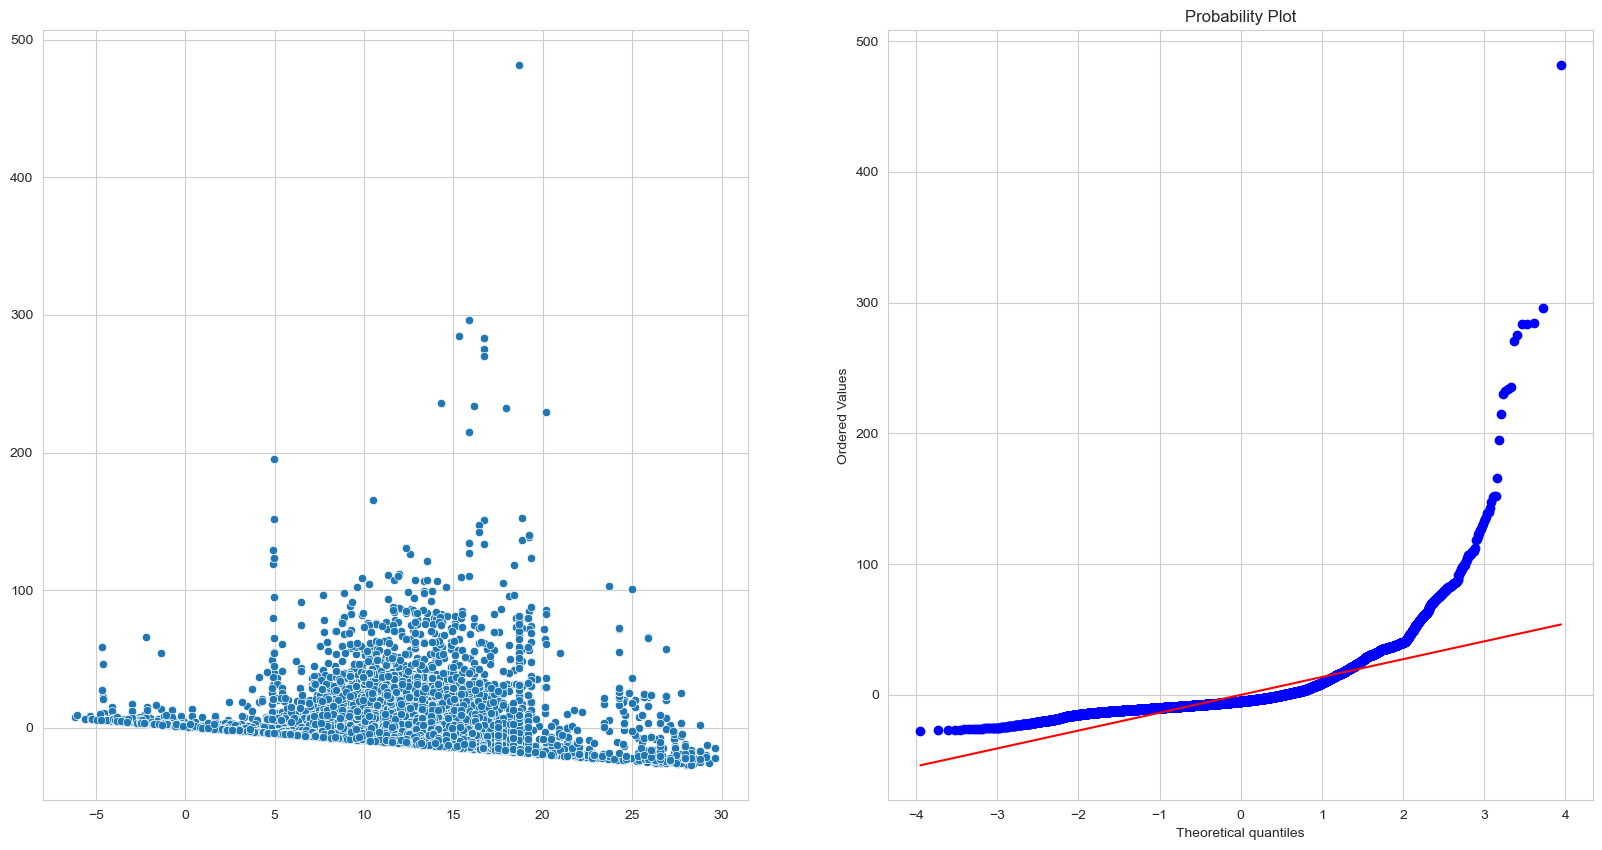

In [168]:
# Runs the above linear regression
l1 = ds_utils.linear_reg(X_con, y, plots=True)

# add equation to dictionary 
eq_lin.update({ds_utils.equation_maker(l1): l1.rsquared})

From the plots of this regression output we can see that there are serious issues in the statistical integrity of the model. The residuals are not normally distributed, as the residuals are not equally spread around 0. This means that there are we have issues in trusting our statistical inferences and particularily the coefficient p-values. The qqplot shows a serious issue in skew and we also have a very low `R-Squared` value of 0.059. Overall, this regression is not useful.

Looking at our p-values we see that the only variable above the 0.05 threshold is `Trap_type_SENTINEL`. We will remove this and re-run our regression with the new `X` matrix.

In [169]:
# Dropping SENTINEL 
X_con.drop(columns="Trap_type_SENTINEL", inplace=True)

We will remove this and re-run our regression with the following: 

`Mosquito_number` ~ $\beta_0$  `const` + $\beta_1$  `Trap_type_GRAVID`
       + $\beta_2$  `Species_CULEX RESTUANS` + $\beta_3$  `Species_CULEX SALINARIUS`
       + $\beta_4$  `Species_CULEX TERRITANS` + $\beta_5$  `Year` + $\beta_6$  `Lon` + $\beta_7$  `Month`

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     157.0
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          8.47e-226
Time:                        18:41:21   Log-Likelihood:                -74185.
No. Observations:               17388   AIC:                         1.484e+05
Df Residuals:                   17380   BIC:                         1.484e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/Users/pippidebree/opt/anaconda3/envs/capenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


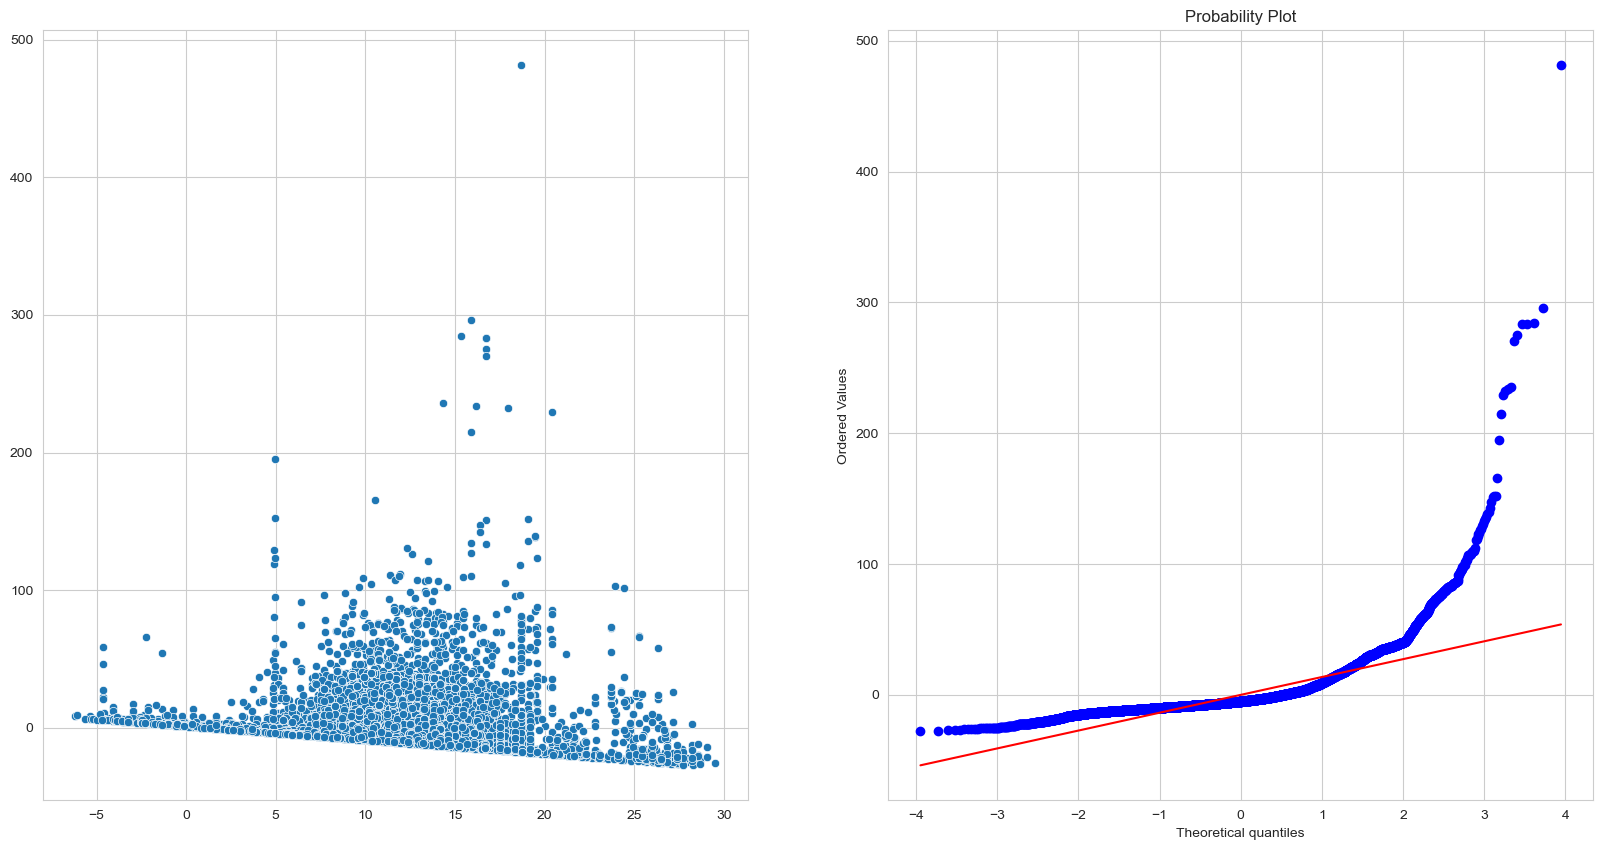

In [170]:
# Running our regression
l2 = ds_utils.linear_reg(X_con, y, plots=True)

# Addings equation to dictionary
eq_lin.update({ds_utils.equation_maker(l2): l2.rsquared})

Here we see similar issues with the residuals and the probability distributions. We have also seen no improvement in `R-Squared`. However, we now have a high standard error for our constant, at 143.832. At this point there is no clear variable to remove, if we want to keep using R^2 as our accuracy metric. 

Below we report the equations for all the linear regressions we just ran and their associated `R-Squared` values. This allows for easier interpretation of our iterations. 

In [171]:
print("Linear Regression Equations and their accuracy:\n")

for i in eq_lin:
    print("Mosquito_Number =", i)
    print("\t\t\t\t\t\t\t\t R-Squared Value:", round(eq_lin[i], 6), "\n\n")

Linear Regression Equations and their accuracy:

Mosquito_Number = (-2783.8276)const + (-13.3209)Trap_type_GRAVID
	 + (0.8906)Trap_type_SENTINEL + (-1.2411)Species_CULEX_RESTUANS + (-10.1772)Species_CULEX_SALINARIUS
	 + (-9.5008)Species_CULEX_TERRITANS + (0.5403)Year + (-0.8539)Month
	 + (-19.7018)Lon
								 R-Squared Value: 0.059475 


Mosquito_Number = (-2790.8451)const + (-13.596)Trap_type_GRAVID
	 + (-1.2317)Species_CULEX_RESTUANS + (-10.1814)Species_CULEX_SALINARIUS + (-9.4977)Species_CULEX_TERRITANS
	 + (0.5452)Year + (-0.8514)Month + (-19.6712)Lon
								 R-Squared Value: 0.059456 




The regression equation that we have ended up with for backwards selection is:

**`Mosquito_number`** ~ - 2790.8451${beta_0}$ - 13.5960`Trap_type_GRAVID` - 1.2317`Species_CULEX_RESTUANS` - 10.1814`Species_CULEX SALINARIUS` - 9.4977 `Species_CULEX TERRITANS` + 0.5452`Year` 
        0.5452 `Month` - 19.6712 `Lon` 

Now, we will look at how forward selection will perform with this set of variables.

### Forward selection: 
Now we will check out linear regression with a forward selection. This will allow us to see if there is a set of variables that achieves a similar `R-squared` while having fewer variables.

We weill start with a regression that only has the constant values. Again, we will track our equations and their `R-Squared` values in order to compare the outputs 

In [172]:
eq_lin2 = {}

In [173]:
# Re-establishing the table of all variables
X_con = sm.add_constant(X)

In [174]:
# Running our regression using only the constant
X_curr = X_con["const"]
f1 = ds_utils.linear_reg(X_curr, y, plots=False)
eq_lin2.update({ds_utils.equation_maker(f1): f1.rsquared})

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                nan
Time:                        18:41:22   Log-Likelihood:                -74718.
No. Observations:               17388   AIC:                         1.494e+05
Df Residuals:                   17387   BIC:                         1.494e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9474      0.135     81.181      0.0

As expected, `R-Squared` = 0 therefore we will begin looking at which variable improves the `R-Squared` the most. 

In order to do this we need a dataframe of all our potential variables. We will use the `ds_utils.higher_rsq` function, which takes in a current X matrix, runs a regression predicting y and calculates the `R-Squared`. It then iterates over the columns that could potentially be added and runs the same regression as before but with each column added. For each of these regressions it calculates the `R-Sqaured`. The variable that increases the `R-Sqaured` most is reported along with the new value.

In [175]:
# Dataframe of potential variables to be add, will be reduced as variables are added to the regression
potents = X_con[['Trap_type_GRAVID', 'Trap_type_SENTINEL',
       'Species_CULEX_RESTUANS', 'Species_CULEX_SALINARIUS',
       'Species_CULEX_TERRITANS', 'Year', 'Lon', 'Month']]

In [176]:
# Creating our y variable
y = mosquito_prepro["Mosquito_number"]

In [177]:
# First look at which variable increase R-Squared the most
f2 = ds_utils.higher_rsq(X_curr, y, potents)
eq_lin2.update({ds_utils.equation_maker(f2): f2.rsquared})

Trap_type_GRAVID improved R-Squared the most, the new R-Squared is 0.015869997200275376 



The output shows use that `Trap_type_GRAVID` improved regression the most, so we will add it to our current variables dataframe and remove it from the potentials and add it to our `X_curr` matrix. This will allow us to perform a new iteration so we can see which variable increase `R-Squared` the most next.

In [178]:
# Adding Trap_type_GRAVID to the current regression
X_curr = pd.merge(X_curr, potents['Trap_type_GRAVID'], left_index=True, right_index=True)

# Dropping Trap_type_GRAVID from potentials
potents = potents.drop(columns="Trap_type_GRAVID")

Now we will perform a second iteration to see which variable improves the regression most.

In [179]:
# Second look at which variable increase R-Squared the most
f3 = ds_utils.higher_rsq(X_curr, y, potents)
eq_lin2.update({ds_utils.equation_maker(f3): f3.rsquared})

Lon improved R-Squared the most, the new R-Squared is 0.03003250821790826 



The `Lon` variable improved the regression most so we will add it to our current dataframe and remove it from `potents` to see if we can improve further.

In [180]:
# Moving Lon from potential to current
X_curr = pd.merge(X_curr, potents['Lon'], left_index=True, right_index=True)
potents = potents.drop(columns="Lon")

We are going to run our third iteration, but this time we will look at our summary statistics in order to consider values other than `R-Squared`.

In [181]:
# Third look at which variable increase R-Squared the most
f4 = ds_utils.higher_rsq(X_curr, y, potents, summary=True)
eq_lin2.update({ds_utils.equation_maker(f4): f4.rsquared})

Year improved R-Squared the most, the new R-Squared is 0.04200651965352631 

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     254.1
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          2.18e-161
Time:                        18:41:22   Log-Likelihood:                -74345.
No. Observations:               17388   AIC:                         1.487e+05
Df Residuals:                   17384   BIC:                         1.487e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

We can conclude that `Year` improves `R-Squared` the most, but we do now see an issue with our constant (it has a very high standard error)

In [182]:
# Moving Year from potential to current
X_curr = pd.merge(X_curr, potents['Year'], left_index=True, right_index=True)
potents = potents.drop(columns="Year")

Before looking for a new variable to add we will check the impact of removing the constant. For this we will use the regular `ds_utils.linear_reg()` function.

In [183]:
# Running our new regression, without constant
f5 = ds_utils.linear_reg(X_curr, y)
eq_lin2.update({ds_utils.equation_maker(f5): f5.rsquared})

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     254.1
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          2.18e-161
Time:                        18:41:22   Log-Likelihood:                -74345.
No. Observations:               17388   AIC:                         1.487e+05
Df Residuals:                   17384   BIC:                         1.487e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2879.5415    137.429  

The constant still proves to be an issue, but we will look further to see if this can be potentially improved.

In [184]:
# Running our r2 increase check again
f6 = ds_utils.higher_rsq(X_curr, y, potents)

eq_lin2.update({ds_utils.equation_maker(f6): f6.rsquared})

Species_CULEX_TERRITANS improved R-Squared the most, the new R-Squared is 0.05375889383850141 



We can now see that `R-Squared` has again improved by adding `Species_CULEX_TERRITANS` and this time not very significantly and we still have a value that is far to low to consider the model well established. 

First we need to move `Species_CULEX_TERRITANS`.

In [185]:
# Moving Species_CULEX_TERRITANS from potential to current
X_curr = pd.merge(X_curr, potents['Species_CULEX_TERRITANS'], left_index=True, right_index=True)
potents = potents.drop(columns="Species_CULEX_TERRITANS")

In [186]:
# Fourth look at which variable increase R-Squared the most
f7 = ds_utils.higher_rsq(X_curr, y, potents, summary=True)

eq_lin2.update({ds_utils.equation_maker(f7): f7.rsquared})

Species_CULEX_SALINARIUS improved R-Squared the most, the new R-Squared is 0.0572123615155784 

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          3.58e-219
Time:                        18:41:23   Log-Likelihood:                -74206.
No. Observations:               17388   AIC:                         1.484e+05
Df Residuals:                   17382   BIC:                         1.485e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

From this we can see that the regression has not been improved much by adding `Species_CULEX_TERRITANS`. We will stop our iterations here. 

The last three iterations had a very low increase in `R-Squared` so we will remove `Species_CULEX_SALINARIUS` to keep model as simple as necessary. This is not very impactful as the `R-Squared` only reduced by 0.002.  Doing this leaves us with a linear regression model of:

**`Mosquito_number`** ~ -2742.0907$\beta_0$ - 13.4554`Trap_type_GRAVID` - 19.7353`Lon` + 0.5145`Year` - 8.7781`Species_CULEX TERRITANS` - 9.3345`Species_CULEX SALINARIUS`


Interestingly our backward selection regression model looked like:

**`Mosquito_number`** ~ - 2790.8451$\beta_0$ - 13.5960`Trap_type_GRAVID` - 1.2317`Species_CULEX_RESTUANS` - 10.1814`Species_CULEX SALINARIUS` - 9.4977 `Species_CULEX TERRITANS` + 0.5452`Year` 
        0.5452 `Month` - 19.6712 `Lon` 

The only difference between these two models is the presence of the `Month` feature. The difference between the forward selection and backwards selection results is only 0.004 (the result of removing `Month`). So it makes sense to remove the variable for model simplicity and use the result of our forward selection. 

**Here is our final linear regression for predicting `Mosquito_number`**:

**`Mosquito_number`** ~ -2742.0907$\beta_0$ - 13.4554`Trap_type_GRAVID` - 19.7353`Lon` + 0.5145`Year` - 8.7781`Species_CULEX TERRITANS` - 9.3345`Species_CULEX SALINARIUS`

Performing forward and backward selection has, essentially, led us to the same result but forward selection highlighted an earlier small improvement in `R-Squared`. Below we show how `R-Squared` changed as our regression equations changed (as a note the final model is the second to last).

In [187]:
print("Linear Regression Equations and their R-Squared Values:\n")

for i in eq_lin2:
    print("Mosquito_Number =", i)
    print("\t\t\t\t\t\t\t\t R-Squared Value:", eq_lin2[i], "\n\n")


Linear Regression Equations and their R-Squared Values:

Mosquito_Number = (10.9474)const
								 R-Squared Value: 1.2212453270876722e-15 


Mosquito_Number = (22.1282)const + (-11.6296)Trap_type_GRAVID
								 R-Squared Value: 0.015869997200275376 


Mosquito_Number = (-1915.5348)const + (-12.2386)Trap_type_GRAVID
	 + (-22.0986)Lon
								 R-Squared Value: 0.03003250821790826 


Mosquito_Number = (-2879.5415)const + (-13.6202)Trap_type_GRAVID
	 + (-21.0091)Lon + (0.5271)Year
								 R-Squared Value: 0.04200651965352631 


Mosquito_Number = (-2764.6038)const + (-13.3224)Trap_type_GRAVID
	 + (-19.5825)Lon + (0.5322)Year + (-8.6628)Species_CULEX_TERRITANS
								 R-Squared Value: 0.05375889383850141 


Mosquito_Number = (-2742.0907)const + (-13.4554)Trap_type_GRAVID
	 + (-19.7353)Lon + (0.5145)Year + (-8.7781)Species_CULEX_TERRITANS
	 + (-9.3345)Species_CULEX_SALINARIUS
								 R-Squared Value: 0.0572123615155784 




As discussed throughout this analysis, this model is not strong and should not be considered reliable when trying to predict `Mosquito_number`. It has a very small R^2 value. However, we can still consider that if these variables do have statistically significant relationships with `Mosquito_number` we may face some issues when using them alongside `Mosquito_number` to predict `WNV_Present`. We will keep this in mind when trying to predict the presence of West Nile Virus using a Logistic Regression.

---

## Predicting the Presence of WNV <a id=Predicting-+-WNV-+-Presence a>

Now, we will look into using a Logistic Regression to predict `WNV_Present`. This means that we are trying to fit a model that calculates the probability that WNV will be found at a specific testing location at a specific time. We have, so far, operated on the assumption that if one mosquito is found to have WNV the whole group is labeled as having WNV. To clarify, this means that we are predicted if a group (of any size) at a location, date, trap and of a specific species, has WNV present in it. We are not making the assumption that all mosquitos in this group have WNV but rather that it is present in the group as a whole.

To begin preparation for our Regression, it is important to revisit the assumptions our regression will be based on. As we are not predicting a value, but rather an outcome (positive or negative for WNV, we do not need to worry about the normality of our dependent variable). 

First we will look at the distribution of our dependent variable `WNV_Present`. 

In [188]:
# First we look at value counts to see the distribution of data
mosquito_prepro["WNV_Present"].value_counts(normalize=True)

0    0.811192
1    0.188808
Name: WNV_Present, dtype: float64

We will create a visualisation for ease of interpretation. 

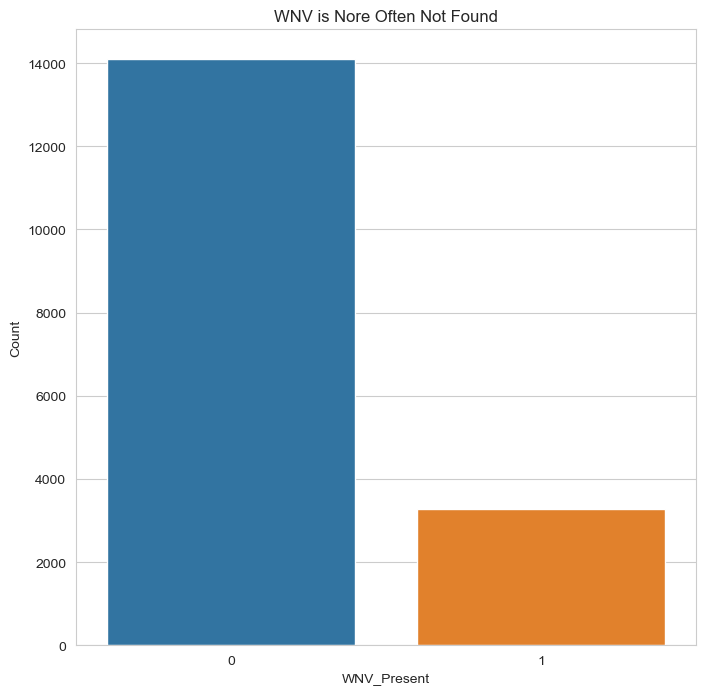

In [189]:
plt.figure()
sns.countplot(x=mosquito_prepro["WNV_Present"])
plt.ylabel("Count")
plt.title("WNV is Nore Often Not Found")
plt.show()

Clearly we can see that there is a skew in the data, as 81% of `WNV_Present` is negative. This creates some issues for our model, as ideally we would have an equal number both results. Going forward we could remove some data points where `WNV_Present` is false to give us an equal number. For now we will continue with the data as is. 

We return to our prepreocessed data (`mosquito_prepro`) in order to re-evaluate the potential independent variables (as we are now concerned with their relationship with `WNV_Present`. 

### Analysis of Relationships <a id=Analysis-+-of-+-Relationships a>

In order to begin looking into the relationships between our variables and `WNV_Present` it is interesting to consider if the categorical variables, particularly `Species` and `Trap_type` have significant relationships with out new independent variable. If we do not find statistical significance in these relationships we may need to consider dropping test variables. 

We will start with `Species` and `WNV_Present`.

#### Statistical Significance of `Species` and `WNV_Present` 

Looking at the relationship between `Species` and `WNV_Present` requires looking at how the latter varies with different species. We will consider this distribution in the output below.

<AxesSubplot:xlabel='Species', ylabel='count'>

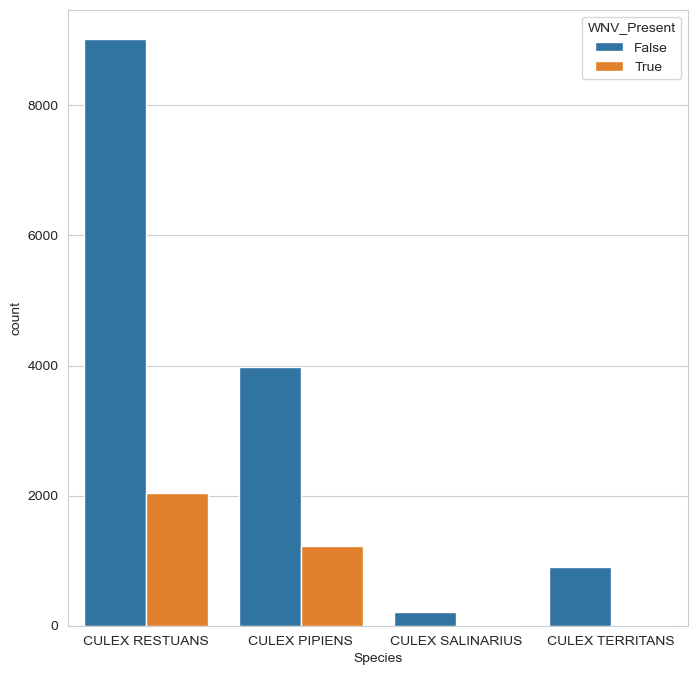

In [190]:
sns.countplot(data=mosquito_clean, x="Species", hue="WNV_Present")

From this output we can see that `Culex Pipiens` Mosquitos have the highest proportion of `WNV_Present` rows. We could infer from this that there is a statistically significant relationship between `Species` and `WNV_Present`, but we need to do a hypothesis test to confirm this.

In order to understand if there is relationship between mosquito species and presence of WNV, we can use a $\chi^2$  test. Using a Chi-Squared test tells us whether there is a statistically significant relationship between two categorical variables (in this case `Species` and `WNV_Present`). In this specific case our null and alternatice hypotheses are as below:

$H_0$: There is no relationship between `Species` and `WNV_Present`

$H_1$: There is some relationship between `Species` and `WNV_Present` (They are not independent)

In order to perform this test we must first create a table with the number of mosquitos for each `Species` / `WNV_Present` combination. We do this by using a pivot table and adding together all of the `Mosquito_number` values that fall into the specific combinations. (Here we are operating on the assumption that for a positive WNV row, all n of the mosquitos in `Mosquito_number` are positive - and the reverse for negative). 

Here we are using our cleaned `mosquito_clean`, not preprocesed version, as this gives us the functionality of being able to groupby the columns with multiple categoreis (i.e. `Species`)

In [191]:
# Creating a pivot table to aggregate Mosquito_number for every Species/WNV Present combination 
pos_specs = mosquito_clean.pivot_table(values="Mosquito_number", 
                            index="WNV_Present", columns="Species", aggfunc=sum)
pos_specs.sort_values

<bound method DataFrame.sort_values of Species      CULEX PIPIENS  CULEX RESTUANS  CULEX SALINARIUS  CULEX TERRITANS
WNV_Present                                                                  
False                30155           83562               433             1776
True                 28151           46229                13               34>

Now that we have the data in the correct format we can use a $\chi^2$  contingency table in order to find the probability that our null hypothesis (That there is no relationship between Species and WNV Present) is true. 

In order to do so we will use the chi2_contingency() function from the SciPy's stats module. 

In [192]:
# Here we are using a chi2 contingency table
stats.chi2_contingency(pos_specs)

(4023.3870842201086,
 0.0,
 3,
 array([[35508.66734961, 79043.41652614,   271.6163969 ,  1102.29972735],
        [22797.33265039, 50747.58347386,   174.3836031 ,   707.70027265]]))

The above output first reports the test statistic, the p-value, the degrees of freedom and an array of expected values. The p-value for the test is 0.0. This indicates to us that we can reject the null hypothesis that there is no relationship between Species and WNV Present. Therefore, we should use the `Species` dummies in our Logistic Regression. 

#### Statistical Significance of `Trap_type` and `WNV_Present` 

Now looking at `Trap_type` and `WNV_Present` we can, again, use the `ds_utils.prepro_plot` to look into the relationship between the categorical variables.

<AxesSubplot:xlabel='Trap_type', ylabel='count'>

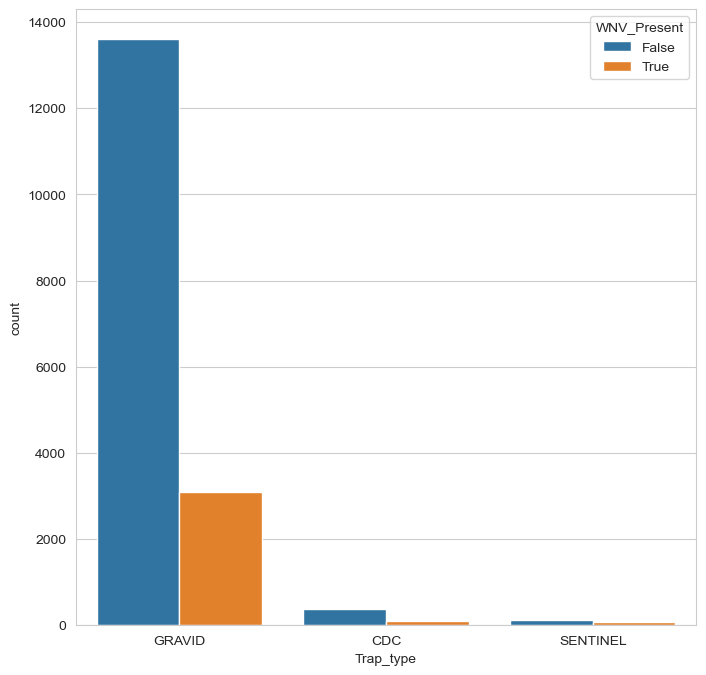

In [193]:
sns.countplot(data=mosquito_clean, x="Trap_type", hue="WNV_Present")

The trap types do have significant differences in the number of rows with `WNV_Present` positive mosquito groups (remember we are considering the number of rows not mosquitos at this point).

In order to look at this relationship, but focusing on the impact of individual mosquitos, we can run the same $\chi^2$  contingency test to uncover whether there is a relationship between `WNV_Present` and `Trap_type`. We will not use our preprocessed version here but again use a pivot table with our `mosquito_clean` dataframe as this has the `Trap_type` variable in it's original form.

In [194]:
pos_traps = mosquito_clean.pivot_table(values="Mosquito_number", 
                            index="WNV_Present", columns="Trap_type", aggfunc=sum)
pos_traps

Trap_type,CDC,GRAVID,SENTINEL
WNV_Present,,,
False,5603,108318,2005
True,4111,67187,3129


In this specific case our null and alternatice hypotheses are as below:

$H_0$ : There is no relationship between `Trap_type` and `WNV_Present` 

$H_1$ : There is some relationship between `Trap_type` and `WNV_Present` (They are not independent)


In [195]:
# Here we are using a chi2 contingency table
stats.chi2_contingency(pos_traps)

(1120.6545373689619,
 4.4973755074315156e-244,
 2,
 array([[  5915.87820523, 106883.4882035 ,   3126.63359128],
        [  3798.12179477,  68621.5117965 ,   2007.36640872]]))

This output shows us that there is a statistically significant relationship between `WNV_Present` and `Trap_type`, because the p-value is below our 0.05 threshold. This may be the result of different, more prone to `WNV_Present` species being attracted to specific traps.

We will now re-consider our variable selection in order to maximise our potential prediction score while reducing any multicollinarity that may come with this high number of potential variables

#### Correlation with `WNV_Present`

At this point we will revisit the correlations between our variables to avoid mutlicollinearity. This time we will consider keeping variables that have a higher correlation and stronger statistical relationship with `WNV_Present`. 

Below we revisit the correlation matrix of all our preprocessed variables.

In [196]:
# Looking at our correlation matrix
mosquito_prepro.corr()

,WNV_Present,Trap_type_CDC,Trap_type_GRAVID,Trap_type_SENTINEL,Species_CULEX_PIPIENS,Species_CULEX_RESTUANS,Species_CULEX_SALINARIUS,Species_CULEX_TERRITANS,Year,Week,Month,Lat,Lon,Mosquito_number
WNV_Present,1.000000,0.011285,-0.040672,0.056657,0.077037,-0.014175,-0.045702,-0.104419,0.136992,0.173795,0.161026,0.054742,-0.060209,0.318070
Trap_type_CDC,0.011285,1.000000,-0.835572,-0.017920,0.139298,-0.133253,0.043878,-0.020440,-0.247967,0.022670,0.062945,-0.042236,0.033191,0.089874
Trap_type_GRAVID,-0.040672,-0.835572,1.000000,-0.534319,-0.091136,0.081821,-0.033066,0.027122,0.138195,-0.041044,-0.071454,0.043092,-0.055353,-0.125976
Trap_type_SENTINEL,0.056657,-0.017920,-0.534319,1.000000,-0.048462,0.056115,-0.007334,-0.017910,0.130018,0.039819,0.033194,-0.013440,0.049671,0.090988
Species_CULEX_PIPIENS,0.077037,0.139298,-0.091136,-0.048462,1.000000,-0.862576,-0.074189,-0.153664,-0.338656,0.312600,0.326953,-0.039031,0.002658,0.010447
Species_CULEX_RESTUANS,-0.014175,-0.133253,0.081821,0.056115,-0.862576,1.000000,-0.150363,-0.311438,0.332971,-0.311135,-0.323467,0.061398,-0.031866,0.058501
Species_CULEX_SALINARIUS,-0.045702,0.043878,-0.033066,-0.007334,-0.074189,-0.150363,1.000000,-0.026786,-0.065891,-0.012329,-0.009813,-0.002827,-0.010495,-0.057166
Species_CULEX_TERRITANS,-0.104419,-0.020440,0.027122,-0.017910,-0.153664,-0.311438,-0.026786,1.000000,0.009752,0.035956,0.031842,-0.050907,0.068530,-0.118784
Year,0.136992,-0.247967,0.138195,0.130018,-0.338656,0.332971,-0.065891,0.009752,1.000000,-0.017186,-0.095690,0.069973,-0.060594,0.097122
Week,0.173795,0.022670,-0.041044,0.039819,0.312600,-0.311135,-0.012329,0.035956,-0.017186,1.000000,0.949938,-0.002168,0.004667,-0.036611


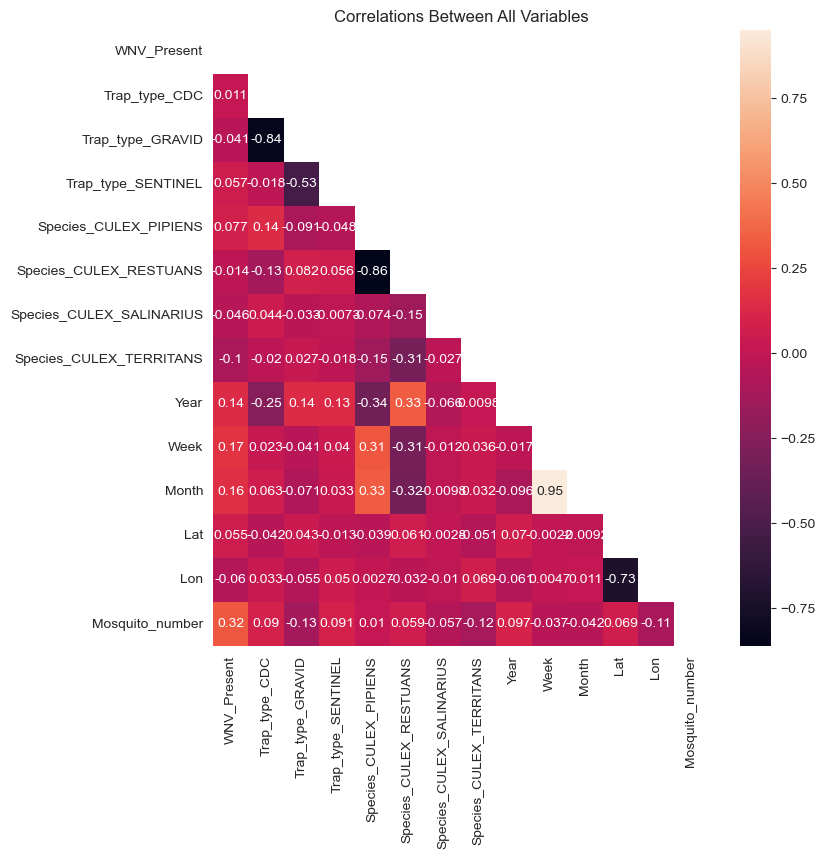

In [197]:
corr = mosquito_prepro.corr()
# Creates a matrix of the correlations.
matrix = np.triu(mosquito_prepro.corr())
# Applies the matrix to a heatmap 
sns.heatmap(corr, annot=True, mask=matrix)
plt.title("Correlations Between All Variables")
plt.show()

The variables with positive correlations to `WNV_Present` are:
- `Trap_type_CDC`
- `Trap_type_SENTINEL` 
- `Species_CULEX_PIPIENS`
- `Year`
- `Week`
- `Lat`
- `Month` 
- `Mosquito_number`

The variables with negative correlations to `WNV_Present` are:
- `Trap_type_GRAVID`
- `Species_CULEX_RESTUAN`
- `Species_CULEX_SALINARIUS` 
- `Species_CULEX_TERRITANS`
- `Lon` 

Again, we see the variables with high correlations that could cause issues if both used: 
- `Trap_type_GRAVID` and `Trap_type_CDC` 
- `Species_CULEX_PIPIENS` `Species_CULEX_RESTUANS`
- `Week` and `Month` 
- `Lat` and `Lon`

We need to decide which of these pairs we want to remove from our potential variables. 

In this case we do not need to consider the statistical significance of each relationship because our independent variable is a categorical. For this reason, in order to reduce multicollinearity we will only look at the relationships with `WNV_Present`. 

Based on the level of correlation with `WNV_Present` (keeping the variable with the higher correlation), we are going to keep:
- `Trap_type_GRAVID` (-0.040682) over `Trap_type_CDC` (0.011294)
- `Species_CULEX_PIPIENS` (0.077070) over `Species_CULEX_RESTUANS` (-0.014217)
- `Week` (0.173835) over `Month` (0.161055)
- `Lon` (-0.067895) over `Lat`(0.054842)

We are going to assign our new `y` vector (`WNV_Present`) and create our new `X` matrix with our chosen variables.

In [198]:
# Initialising our new dependent variable.
y2 = mosquito_prepro["WNV_Present"]

In [199]:
# Creating a variable that holds all of our potential dependent variables
wnv_pred = mosquito_prepro.drop(columns=['WNV_Present','Trap_type_CDC',  'Species_CULEX_RESTUANS', 'Month', 'Lat'])

In [200]:
# Initialising our X matrix (we will change this)
X2 = wnv_pred

In [201]:
# Adding a constant to our variables
X2_con = sm.add_constant(X2)

#### `WNV_Present` and Numeric Variables

In order to understand how our numeric variables relate to `WNV_Present` we will plot scatter graphs. This will show us if ther is a clear distinction that may help us to see the 

We have already looked at `Trap_type` and `Species` so now we will look at `Year`, `Week`, `Lon` and `Mosquito_number`.

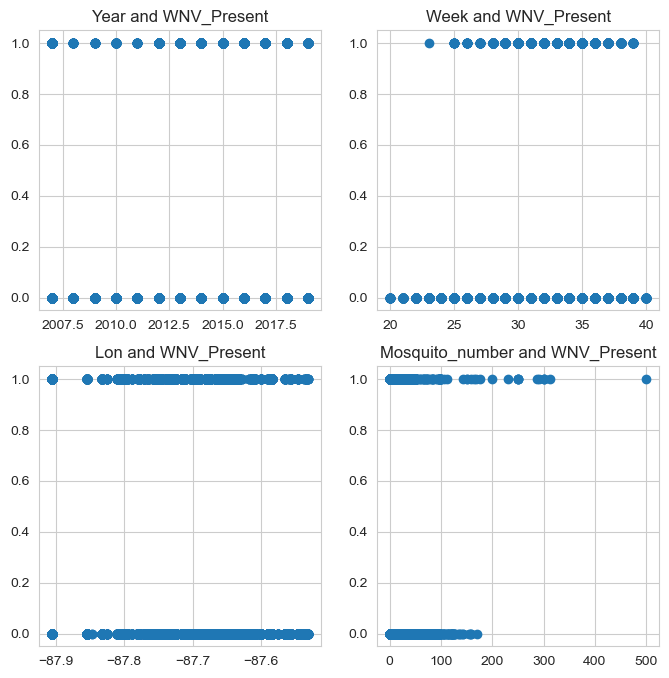

In [202]:
gridspec.GridSpec(2,2)

# Looking at Year and WNV_Present
x_points = np.arange(min(wnv_pred["Year"]), max(wnv_pred["Year"]), 0.01)

plt.subplot2grid((2,2), (0,0))
plt.scatter(wnv_pred["Year"], y2)
plt.title("Year and WNV_Present")


# Looking at Week and WNV_Present
plt.subplot2grid((2,2), (0,1))
plt.scatter(wnv_pred["Week"], y2)
plt.title("Week and WNV_Present")


# Look at Lon and WNV_Present
plt.subplot2grid((2,2), (1,0))
plt.scatter(wnv_pred["Lon"], y2)
plt.title("Lon and WNV_Present")


# Looking at Mosquito_number and WNV_Present
plt.subplot2grid((2,2), (1,1))
plt.scatter(wnv_pred["Mosquito_number"], y2)
plt.title("Mosquito_number and WNV_Present")

plt.show()

From this output it is difficult to see if there are significant relationships between the numeric variables and `WNV_Present`. We can see that looking at `Year` and `Lon` do not look promising, however we cannot be sure of the density of the data points. There does seem to be a link in `Mosquito_number` that could be helpful. 

Now we will begin our Logistic Regression analysis.

## Logistic Regression <a id=Logistic-+-Regression a> 

In order to look at the relationship between `WNV_Present` and all of our potential variables we will begin with all of the variables. We will use our `ds_utils.logit_reg` function to run our logisitc regressions. This function reports the summary statistics of the regression and the odds ratios for each coeffients. Looking at the odds ratios with the summaries will help us when considering the importance of variables.

We will then use the `ds_utils.logit_accuracy` function to evaluate the accuracy of our model (based on the function value we see in the summary results). 

This function will also return to us how many of the values it predicted correctly. 

`WNV_Present` ~ $\beta_0$  `const` + $\beta_1$  `Trap_type_GRAVID` + $\beta_2$  `Trap_type_SENTINEL`
       + $\beta_3$  `Species_CULEX_PIPIENS` + $\beta_4$  `Species_CULEX SALINARIUS`
       + $\beta_5$  `Species_CULEX TERRITANS` + $\beta_6$  `Year` + $\beta_7$  `Week` + $\beta_8$  `Lon`
       + $\beta_9$  `Mosquito_number`
       

In order to keep track of our regressions we will create a dictionary of equations and their accuracy scores. We will do this by using the `ds_utils.equation_maker`, which takes a regression result and returns the names of all the variables with their coefficients in the form of an equation. We will make the value of this dictionary key the accuracy score.

In [203]:
eqs = {}

To run our regressions we are using the `ds_utils.logit_reg` function, which creates and executes a Logistic Regression based on the passed in X matric and y vector. It returns the result of the regession, so we can look into different aspects of the output. It also reports the odds ratios for each variable.

We are going to use the `.predict()` function to see what probability of positive WNV our model gives to each data point. Then to calculate accuracy we will turn this vector of probabilities into a binary vector, where the decision to mark `1` or `0` is based on whether the probability is above a threshold. The model itself calculates a function value, which is, in theory, the optimal threshold.

We calculate the accuracy using the `ds_utils.logit_accuracy` function which takes in the real results, y, the array of calculated probabilities and the threshold (in this case we will use the function value). It then creates the binary array based on the threshold and returns the accuracy score. 

Finally, we will create an equation using `ds_utils.equation_maker` and store this as a key in the `eqs` dictionary with the accuracy result as the value.

In [204]:
# Running the equation
reg_res = ds_utils.logit_reg(X2_con, y2)

# Getting the accuracy 
acc1 = ds_utils.logit_accuracy(y2, reg_res.predict(X2_con), 0.402644)

# Now we calculate the accuracy using the function value from the regression
print("\nThe classification accuracy is", acc1 , "% with threshold", 0.402644)

# Adding equation to dictionary
eqs.update({ds_utils.equation_maker(reg_res): acc1})

Optimization terminated successfully.
         Current function value: 0.402883
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            WNV_Present   No. Observations:                17388
Model:                          Logit   Df Residuals:                    17378
Method:                           MLE   Df Model:                            9
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                  0.1684
Time:                        18:41:26   Log-Likelihood:                -7005.3
converged:                       True   LL-Null:                       -8424.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -286.0843     23.553    -12.146      0.000    -332.248

The regression predicts probabilities, and if they are above the function value threshold, here 0.402644, we consider that data point is positive for `WNV_Present`. We will look at the accuracy of this model for future reference.

The accuracy here is 82.32%, this is calculated by comparing the predicted results to the actual results in the data. This is a fairly good start for accuracy, but the regression needs adaptation. To start we will remove `Trap_type_SENTINEL` because of it's high p-value

In [205]:
# We remove "const"
X2_con.drop(columns="Trap_type_SENTINEL", inplace=True)

We will now run the following regression.

`WNV_Present` ~ $\beta_0$ + $\beta_1$  `Trap_type_GRAVID` 
       + $\beta_2$  `Species_CULEX_PIPIENS` + $\beta_3$  `Species_CULEX SALINARIUS`
       + $\beta_4$  `Species_CULEX TERRITANS` + $\beta_5$  `Year` + $\beta_6$  `Week` + $\beta_7$  `Lon`
       + $\beta_b$  `Mosquito_number`

In [206]:
# Running the regression
reg_res2 = ds_utils.logit_reg(X2_con, y2)

# Getting the accuracy 
acc2 = ds_utils.logit_accuracy(y2, reg_res2.predict(X2_con), 0.407330)

# Now we calculate the accuracy using the function value from the regression
print("\nThe classification accuracy is",acc2 , "% with threshold", 0.407330)

# Adding equation to dictionary 
eqs.update({ds_utils.equation_maker(reg_res2): acc2})

Optimization terminated successfully.
         Current function value: 0.402901
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            WNV_Present   No. Observations:                17388
Model:                          Logit   Df Residuals:                    17379
Method:                           MLE   Df Model:                            8
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                  0.1684
Time:                        18:41:26   Log-Likelihood:                -7005.6
converged:                       True   LL-Null:                       -8424.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -283.7253     23.358    -12.147      0.000    -329.506

In [207]:
# We remove "Trap_type_SENTINEL"
X2_con.drop(columns="Trap_type_GRAVID", inplace=True)

Now we are going to re-run our model with the regression:

`WNV_Present` ~ $\beta_0$ + 
       + $\beta_1$  `Species_CULEX_PIPIENS` + $\beta_2$  `Species_CULEX SALINARIUS`
       + $\beta_3$  `Species_CULEX TERRITANS` + $\beta_4$  `Year` + $\beta_5$  `Week` + $\beta_6$  `Lon`
       + $\beta_7$  `Mosquito_number`

In [208]:
# Running the regression
reg_res3 = ds_utils.logit_reg(X2_con, y2)
# Getting the accuracy
acc3 = ds_utils.logit_accuracy(y2, reg_res3.predict(X2_con), 0.407348)

# Now we calculate the accuracy using the function value from the regression
print("\nThe classification accuracy is", acc3 , "% with threshold", 0.407348)

# Adding equation to dictionary 
eqs.update({ds_utils.equation_maker(reg_res3): acc3})

Optimization terminated successfully.
         Current function value: 0.402902
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            WNV_Present   No. Observations:                17388
Model:                          Logit   Df Residuals:                    17380
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                  0.1684
Time:                        18:41:26   Log-Likelihood:                -7005.7
converged:                       True   LL-Null:                       -8424.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -284.4160     23.074    -12.326      0.000    -329.641

Again, we see no improvement in accuracy, a slight drop. We can now consider removing variables based on their odds ratio. As the `Species` dummies all have the same units we can look at which of these has the lowest odds ratio - this is `Species_CULEX_SALINARIUS`. We will therefore look at the impact that removing this has on our model.

In [209]:
# We remove "Species_CULEX_SALINARIUS"
X2_con.drop(columns="Species_CULEX_TERRITANS", inplace=True)

Our new regression is:


`WNV_Present` ~ $\beta_0$ + 
       + $\beta_1$  `Species_CULEX_PIPIENS` 
       + $\beta_2$  `Species_CULEX_SALINARIUS + $\beta_3$  `Year` + $\beta_4$  `Week` + $\beta_5$  `Lon`
       + $\beta_6$  `Mosquito_number`

In [210]:
# Running the regression
reg_res4 = ds_utils.logit_reg(X2_con, y2)

# Getting our accuracy 
acc4 = ds_utils.logit_accuracy(y2, reg_res4.predict(X2_con), 0.407816)

# Now we calculate the accuracy using the function value from the regression
print("\nThe classification accuracy is", acc4 , "% with threshold", 0.407816)

# Adding equation to dictionary 
eqs.update({ds_utils.equation_maker(reg_res4): acc4})

Optimization terminated successfully.
         Current function value: 0.407364
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            WNV_Present   No. Observations:                17388
Model:                          Logit   Df Residuals:                    17381
Method:                           MLE   Df Model:                            6
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                  0.1592
Time:                        18:41:26   Log-Likelihood:                -7083.2
converged:                       True   LL-Null:                       -8424.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -298.9815     22.865    -13.076      0.000    -343.797

From this output we can see that all of the values are statistically significant and we have had little improvement in the accuracy (still around 82.3%). However, we do still have a lot of variables. At this point we continue removing any of the variables that may have a very low impact and therefore are non-essential. `Species_CULEX_TERRITANS` is next because it has a very low odds ratio. 

In [211]:
# We remove "Species_CULEX_TERRITANS"
X2_con.drop(columns="Species_CULEX_SALINARIUS", inplace=True)

Now we have the regression:


`WNV_Present` ~ $\beta_0$ 
       + $\beta_1$  `Species_CULEX_PIPIENS` 
       + $\beta_2$  `Year` + $\beta_3$  `Week` + $\beta_4$  `Lon`
       + $\beta_5$  `Mosquito_number`

In [212]:
# Running the regression
reg_res5 = ds_utils.logit_reg(X2_con, y2)

# Getting our accuracy 
acc5 = ds_utils.logit_accuracy(y2, reg_res5.predict(X2_con), 0.412739)

# Now we calculate the accuracy using the function value from the regression
print("\nThe classification accuracy is",acc5, "% with threshold", 0.412739)

# Adding our equation to the dictionatry
eqs.update({ds_utils.equation_maker(reg_res5): acc5})

Optimization terminated successfully.
         Current function value: 0.407685
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            WNV_Present   No. Observations:                17388
Model:                          Logit   Df Residuals:                    17382
Method:                           MLE   Df Model:                            5
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                  0.1585
Time:                        18:41:26   Log-Likelihood:                -7088.8
converged:                       True   LL-Null:                       -8424.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -300.6059     22.836    -13.163      0.000    -345.364    -255.

From this we see a slight increase in accuracy and have removed a non-essential variable, we have our highest accuracy so far. We will now look at removing `Lon` if the accuracy does not go down by much (`Mosquito_number` cannot be removed from the model) we will drop it.

In [213]:
# We remove "Year"
X2_con.drop(columns="Lon", inplace=True)

Current Regression:

`WNV_Present` ~ $\beta_0$ 
       + $\beta_1$  `Species_CULEX_PIPIENS` 
       + $\beta_2$ `Year`
       + $\beta_3$  `Week` + $\beta_4$  `Lon` 
       + $\beta_5$  `Mosquito_number`

In [214]:
# Running the regression
reg_res6 = ds_utils.logit_reg(X2_con, y2)

# Getting the accuracies 
acc6 = ds_utils.logit_accuracy(y2, reg_res6.predict(X2_con), 0.417474)

# Now we calculate the accuracy using the function value from the regression
print("\nThe classification accuracy is",acc6, "% with threshold", 0.417474)

# Adding equation to dictionary 
eqs.update({ds_utils.equation_maker(reg_res6): acc6})

Optimization terminated successfully.
         Current function value: 0.407938
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            WNV_Present   No. Observations:                17388
Model:                          Logit   Df Residuals:                    17383
Method:                           MLE   Df Model:                            4
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                  0.1580
Time:                        18:41:26   Log-Likelihood:                -7093.2
converged:                       True   LL-Null:                       -8424.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -245.6415     13.336    -18.420      0.000    -271.779    -219.

Our accuracy is barely impacted, therefore we have removed a non-essential variable. We now have five variables.

There is no issue with our Logistic Regression and at this point the variables all seem necessary. We will stop here, as at this point I looked into all combinations of the last three droppable variables and found that removing any of them either created an issue with p-values or decreased the accuracy significantly. 

We end up with a classification accuracy of 82.51% when we use the threshold of 0.417474 on the following regression:

**`WNV_Present`** ~ -245.6415$\beta_0$ + 0.4389 `Trap_type_GRAVID` 
       + 0.1189 `Year` + 0.1284 `Week` 
       + 0.0467 `Mosquito_number`
       
The above iterations over different regressions is clunky, so it is helpful to look at these results summarised.

In [215]:
print("Regression Equations and their accuracy:\n")

for i in eqs:
    print("WNV_Present =", i)
    print("\t\t\t\t\t\t\t\t Accuracy:", eqs[i], "\n\n")


Regression Equations and their accuracy:

WNV_Present = (-286.0843)const + (-0.0535)Trap_type_GRAVID
	 + (-0.1751)Trap_type_SENTINEL + (0.3264)Species_CULEX_PIPIENS + (-1.2092)Species_CULEX_SALINARIUS
	 + (-2.313)Species_CULEX_TERRITANS + (0.1139)Year + (0.1334)Week
	 + (-0.5744)Lon + (0.0445)Mosquito_number
								 Accuracy: 82.28 


WNV_Present = (-283.7253)const + (0.0209)Trap_type_GRAVID
	 + (0.3286)Species_CULEX_PIPIENS + (-1.2088)Species_CULEX_SALINARIUS + (-2.311)Species_CULEX_TERRITANS
	 + (0.1126)Year + (0.1332)Week + (-0.578)Lon
	 + (0.0445)Mosquito_number
								 Accuracy: 82.3 


WNV_Present = (-284.416)const + (0.3284)Species_CULEX_PIPIENS
	 + (-1.2103)Species_CULEX_SALINARIUS + (-2.3108)Species_CULEX_TERRITANS + (0.1127)Year
	 + (0.1331)Week + (-0.5829)Lon + (0.0444)Mosquito_number
								 Accuracy: 82.3 


WNV_Present = (-298.9815)const + (0.4243)Species_CULEX_PIPIENS
	 + (-1.1086)Species_CULEX_SALINARIUS + (0.1164)Year + (0.1288)Week
	 + (-0.6647)Lon + (0.0461)Mosqui

From this we can see that accuracy really did not vary as we removed variables. 

We can now look at how successful the function value in our chosen regression. comparing it to a range of threshold values shows why it was chosen. By this we mean the value at which a probability is decided to signify positivity or not. Looking at how this varies may give us an idea of how to consider false positives. 

In [216]:
# Creating a range of thresholds from 0 to 1, the probability range
thresholds = np.arange(0,1, 0.01)

# Initialising an empty list for our accuracy and t value pairs.
accs = []

# 
for t in thresholds:
    accs.append(ds_utils.logit_accuracy(y2, reg_res6.predict(X2_con),  t))
    

In [217]:
# Creating a dictionary of accuracies and corresponding thresholds
accs_range = pd.DataFrame({"Accuracy": accs, "Threshold": thresholds})

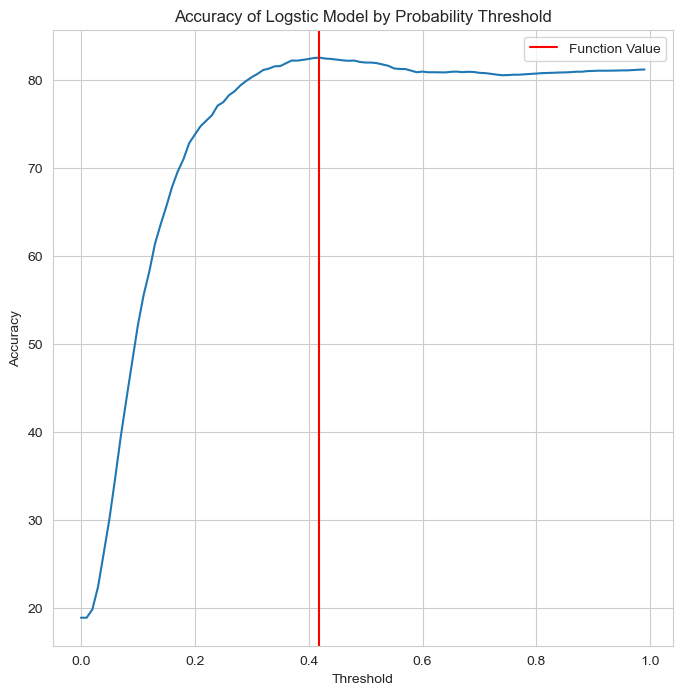

In [218]:
sns.lineplot(data=accs_range, x="Threshold", y="Accuracy")
plt.title("Accuracy of Logstic Model by Probability Threshold")
plt.axvline(0.417536, color="Red", label='Function Value')
plt.legend()
plt.show()

From this we can see why the function value was set at 0.417536, as this seems to be a peak in the accuracy of the model. It is clear that above this the model's ability to predict `WNV_Present` does not improve. 

This being our final regression shows that there were a lot of variables that had little impact on `WNV_Present`. It makes sense that we ended up with a trap variable,`Species_CULEX_PIPIENS`, as in our statistical analysis we saw that the number of `WNV_Present` positives did vary with trap type. We did not expect to keep `Lon` but this may be the result of the virus being spread accross the city in specific patches. Particularly we could consider longitude as distance from Lake Michigan to Chicago's east. It is not surprising that we ended up with date variables, `Week` and `Year` because it makes sense that the number of mosquitos present would have an impact on `WNV_Present` and there are differences in mosquito number accross the season because of temperature activation. Finally, it is not surprising that` Mosquito_number` is important in this relationship. Logically, it makes sense that if there are more mosquitos interacting with each other there is a higher chance that one of them is carrying the West Nile Virus and spreading it to the other mosquitos.

---